In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load data
df = pd.read_csv("disease.csv")

# Take a look
print(df.head())
print(df.info())

                                  Disease      Common disease group  \
0  Urethritis (infectious, noninfectious)  Urinary tract infections   
1     Cystitis (acute bacterial cystitis)  Urinary tract infections   
2    Interstitial cystitis (nonbacterial)  Urinary tract infections   
3        Pyelonephritis (acute bacterial)  Urinary tract infections   
4                  Chronic pyelonephritis  Urinary tract infections   

                                            Symptoms  \
0  Burning urination; pain during urination (dysu...   
1  Burning urination; frequent urination; urgency...   
2  Chronic pelvic pain; bladder pressure; frequen...   
3  High fever; chills; flank pain; nausea; vomiti...   
4  Vague flank/abdominal pain; malaise; recurrent...   

                         Disease Group       Dosha Types  
0  Lower urinary tract infection (UTI)  Vata|Pitta|Kapha  
1        Lower UTI (bladder infection)  Pitta|Vata|Kapha  
2    Nonbacterial bladder inflammation        Vata|Pitta  


In [3]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("disease.csv")

# Display first 5 rows
print("Sample rows:")
print(df.head())

# Get dataset information
print("\nDataset info:")
print(df.info())

# Check for missing values in each column
print("\nMissing values per column:")
print(df.isnull().sum())

# Get dataset shape (rows, columns)
print("\nDataset shape (rows, columns):")
print(df.shape)


Sample rows:
                                  Disease      Common disease group  \
0  Urethritis (infectious, noninfectious)  Urinary tract infections   
1     Cystitis (acute bacterial cystitis)  Urinary tract infections   
2    Interstitial cystitis (nonbacterial)  Urinary tract infections   
3        Pyelonephritis (acute bacterial)  Urinary tract infections   
4                  Chronic pyelonephritis  Urinary tract infections   

                                            Symptoms  \
0  Burning urination; pain during urination (dysu...   
1  Burning urination; frequent urination; urgency...   
2  Chronic pelvic pain; bladder pressure; frequen...   
3  High fever; chills; flank pain; nausea; vomiti...   
4  Vague flank/abdominal pain; malaise; recurrent...   

                         Disease Group       Dosha Types  
0  Lower urinary tract infection (UTI)  Vata|Pitta|Kapha  
1        Lower UTI (bladder infection)  Pitta|Vata|Kapha  
2    Nonbacterial bladder inflammation        

In [4]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("disease.csv")

# Unique values in 'Disease'
print("Number of unique diseases:", df['Disease'].nunique())

# Unique values in 'Common disease group'
print("Number of unique common disease groups:", df['Common disease group'].nunique())
print("List of common disease groups:", df['Common disease group'].unique())

# Unique values in 'Disease Group'
print("Number of unique disease groups:", df['Disease Group'].nunique())

# Unique values in 'Dosha Types'
print("Number of unique dosha type combinations:", df['Dosha Types'].nunique())
print("Sample dosha combinations:", df['Dosha Types'].unique()[:20])  # show first 20 for preview


Number of unique diseases: 1500
Number of unique common disease groups: 16
List of common disease groups: ['Urinary tract infections' 'Muscular disorders' 'Cardiomyopathies'
 'zoonotic diseases' 'Liver disease' 'Hematological diseases'
 'Cardiovascular diseases' 'Cancer and neoplasms' 'Eye diseases'
 'Ear diseases' 'Tropical diseases' 'tropical diseases'
 'Endocrine and Metabolic Diseases'
 'Mental health / Psychiatric disorders' 'Nutritional Deficiency Diseases'
 'Reproductive system diseases']
Number of unique disease groups: 958
Number of unique dosha type combinations: 38
Sample dosha combinations: ['Vata|Pitta|Kapha' 'Pitta|Vata|Kapha' 'Vata|Pitta' 'Pitta|Kapha'
 'Pitta|Kapha|Vata' 'Pitta|Vata' 'Kapha|Pitta|Vata' 'kapha|pitta|vata'
 'pitta|kapha|vata' 'vata|pitta|kapha' 'pitta|vata|kapha' 'vata|pitta'
 'kapha|pitta' 'kapha|vata|pitta' 'pitta|vata' 'kapha|vata' 'vata'
 'vata|kapha' 'vata|kapha|pitta' 'kapha']


In [5]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("disease.csv")

# Count samples per Common disease group
print("Counts for Common disease groups:")
print(df['Common disease group'].value_counts())

# Count samples per Disease Group (show top 20 because there are many)
print("\nCounts for Disease Groups (top 20):")
print(df['Disease Group'].value_counts().head(20))

# Count samples per Dosha Types
print("\nCounts for Dosha Types:")
print(df['Dosha Types'].value_counts())


Counts for Common disease groups:
Common disease group
Urinary tract infections                 100
Muscular disorders                       100
Cardiomyopathies                         100
zoonotic diseases                        100
Liver disease                            100
Hematological diseases                   100
Cardiovascular diseases                  100
Cancer and neoplasms                     100
Eye diseases                             100
Ear diseases                             100
Mental health / Psychiatric disorders    100
Endocrine and Metabolic Diseases         100
Nutritional Deficiency Diseases          100
Reproductive system diseases             100
Tropical diseases                         84
tropical diseases                         16
Name: count, dtype: int64

Counts for Disease Groups (top 20):
Disease Group
Muscular dystrophy                                       16
Congenital heart disease                                 14
Infectious disease          

In [1]:
import re
import pandas as pd

# Load your CSV
df = pd.read_csv("disease.csv")

# Canonical order we want to enforce in 2-dosha combos
ORDER = ["vata", "pitta", "kapha"]
ORDER_SET = set(ORDER)

def normalize_dosha(x):
    if pd.isna(x):
        return pd.NA

    s = str(x).strip().lower()

    # If it's any tridosha wording, normalize straight away
    # (covers 'tridosha', 'trisosha', 'tri dosha', etc.)
    if "tridosha" in s or "trisosha" in s or re.search(r"\btri\s*dosha\b", s):
        return "tridosha"

    # Replace separators ; , / + with '|', drop spaces, and strip odd chars
    s = re.sub(r"[;,+/]+", "|", s)     # unify to '|'
    s = s.replace(" ", "")
    s = re.sub(r"[^a-z|]", "", s)      # keep only letters and '|'

    # Split to parts, remove empties, keep only known doshas
    parts = [p for p in s.split("|") if p]
    parts = [p for p in parts if p in ORDER_SET]

    if not parts:
        return pd.NA

    # Deduplicate and enforce canonical order vata -> pitta -> kapha
    present = [d for d in ORDER if d in parts]

    # Any 3 doshas -> 'tridosha'
    if len(present) >= 3:
        return "tridosha"

    # 1 or 2 doshas -> join with '|'
    return "|".join(present)

# Apply normalization
df["Dosha_Clean"] = df["Dosha Types"].apply(normalize_dosha)

# Inspect results
print("Original unique dosha combos (sample 20):")
print(df["Dosha Types"].unique()[:20])

print("\nNormalized unique dosha combos:")
print(df["Dosha_Clean"].unique())

print("\nCounts after normalization:")
print(df["Dosha_Clean"].value_counts(dropna=False))

# (Optional) Check rows that became NA after cleaning (unexpected formats)
print("\nRows with unrecognized/empty dosha after cleaning:")
print(df[df["Dosha_Clean"].isna()].head())


Original unique dosha combos (sample 20):
['Vata|Pitta|Kapha' 'Pitta|Vata|Kapha' 'Vata|Pitta' 'Pitta|Kapha'
 'Pitta|Kapha|Vata' 'Pitta|Vata' 'Kapha|Pitta|Vata' 'kapha|pitta|vata'
 'pitta|kapha|vata' 'vata|pitta|kapha' 'pitta|vata|kapha' 'vata|pitta'
 'kapha|pitta' 'kapha|vata|pitta' 'pitta|vata' 'kapha|vata' 'vata'
 'vata|kapha' 'vata|kapha|pitta' 'kapha']

Normalized unique dosha combos:
['tridosha' 'vata|pitta' 'pitta|kapha' 'vata|kapha' 'vata' 'kapha' 'pitta']

Counts after normalization:
Dosha_Clean
vata           446
pitta          383
vata|pitta     240
vata|kapha     152
tridosha       111
kapha          101
pitta|kapha     67
Name: count, dtype: int64

Rows with unrecognized/empty dosha after cleaning:
Empty DataFrame
Columns: [Disease, Common disease group, Symptoms, Disease Group, Dosha Types, Dosha_Clean]
Index: []


In [9]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [13]:
# A) COMMON DISEASE GROUP (multi-class) with oversampling
import re
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier

# --- Load ---
df = pd.read_csv("disease.csv")

# --- (Optional) normalize common group casing (fix tropical duplicates) ---
def normalize_common_group(s):
    if pd.isna(s): 
        return s
    t = str(s).strip()
    # unify case exactly for "Tropical diseases"
    if t.lower() == "tropical diseases":
        return "Tropical diseases"
    return t

df["Common disease group"] = df["Common disease group"].apply(normalize_common_group)

# --- Basic text feature = Symptoms ---
X_text = df["Symptoms"].fillna("")

# --- Target = Common disease group ---
y_group = df["Common disease group"].astype(str)

# --- Train-test split (stratify to preserve class proportions) ---
X_train, X_test, y_train, y_test = train_test_split(
    X_text, y_group, test_size=0.2, random_state=42, stratify=y_group
)

# --- Imbalance-aware pipeline: TF-IDF -> RandomOverSampler -> OneVsRest(LogisticRegression) ---
pipe_group = Pipeline(steps=[
    ("tfidf", TfidfVectorizer(max_features=20000, ngram_range=(1,2))),
    ("ros",   RandomOverSampler(random_state=42)),
    ("clf",   OneVsRestClassifier(
        LogisticRegression(
            max_iter=2000,
            class_weight="balanced",
            n_jobs=None
        )
    )),
])

# --- Train ---
pipe_group.fit(X_train, y_train)

# --- Evaluate ---
y_pred = pipe_group.predict(X_test)
print("\n=== Common disease group: Test metrics ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Macro F1:", f1_score(y_test, y_pred, average="macro"))
print("\nClassification report:")
print(classification_report(y_test, y_pred))

# (Optional) quick CV:
# cv_scores = cross_val_score(pipe_group, X_text, y_group, cv=5, scoring="f1_macro")
# print("CV macro F1:", cv_scores.mean(), "+/-", cv_scores.std())



=== Common disease group: Test metrics ===
Accuracy: 0.8833333333333333
Macro F1: 0.8819803716466106

Classification report:
                                       precision    recall  f1-score   support

                 Cancer and neoplasms       0.79      0.95      0.86        20
                     Cardiomyopathies       0.95      0.95      0.95        20
              Cardiovascular diseases       0.90      0.95      0.93        20
                         Ear diseases       1.00      0.95      0.97        20
     Endocrine and Metabolic Diseases       0.72      0.65      0.68        20
                         Eye diseases       0.86      0.95      0.90        20
               Hematological diseases       0.94      0.85      0.89        20
                        Liver disease       0.95      1.00      0.98        20
Mental health / Psychiatric disorders       1.00      1.00      1.00        20
                   Muscular disorders       0.90      0.95      0.93        20
    

In [15]:
# B) DOSHA MULTI-LABEL (one-vs-rest with oversampling per label)
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# --- Load ---
df = pd.read_csv("disease.csv")
X_text = df["Symptoms"].fillna("")

# --- Dosha normalization ---
ORDER = ["vata", "pitta", "kapha"]
ORDER_SET = set(ORDER)

def normalize_dosha(x):
    if pd.isna(x):
        return pd.NA
    s = str(x).strip().lower()
    if "tridosha" in s or "trisosha" in s or re.search(r"\btri\s*dosha\b", s):
        return "tridosha"
    s = re.sub(r"[;,+/]+", "|", s)
    s = s.replace(" ", "")
    s = re.sub(r"[^a-z|]", "", s)
    parts = [p for p in s.split("|") if p]
    parts = [p for p in parts if p in ORDER_SET]
    present = [d for d in ORDER if d in parts]
    if len(present) >= 3:
        return "tridosha"
    return "|".join(present) if present else pd.NA

if "Dosha_Clean" not in df.columns:
    df["Dosha_Clean"] = df["Dosha Types"].apply(normalize_dosha)

# --- Expand Dosha_Clean into three binary columns ---
def row_to_labels(clean_val):
    if pd.isna(clean_val):
        return pd.Series({"vata": 0, "pitta": 0, "kapha": 0})
    if clean_val == "tridosha":
        return pd.Series({"vata": 1, "pitta": 1, "kapha": 1})
    parts = set(str(clean_val).split("|"))
    return pd.Series({
        "vata":  int("vata"  in parts),
        "pitta": int("pitta" in parts),
        "kapha": int("kapha" in parts),
    })

# Y is already a DataFrame here — no concat needed
df_y = df["Dosha_Clean"].apply(row_to_labels)
assert set(df_y.columns) == {"vata","pitta","kapha"}

# --- Train/test split ---
X_train, X_test, Y_train, Y_test = train_test_split(
    X_text, df_y, test_size=0.2, random_state=42
)

# --- Train one OvR model per label with ROS ---
def train_one_label(label_name):
    pipe = Pipeline(steps=[
        ("tfidf", TfidfVectorizer(max_features=20000, ngram_range=(1,2))),
        ("ros",   RandomOverSampler(random_state=42)),
        ("clf",   LogisticRegression(max_iter=2000, class_weight="balanced")),
    ])
    pipe.fit(X_train, Y_train[label_name])
    return pipe

models = {lbl: train_one_label(lbl) for lbl in ["vata","pitta","kapha"]}

# --- Predict (threshold = 0.5) ---
Y_pred = pd.DataFrame(index=Y_test.index, columns=["vata","pitta","kapha"])
for lbl in ["vata","pitta","kapha"]:
    proba = models[lbl].predict_proba(X_test)[:, 1]
    Y_pred[lbl] = (proba >= 0.5).astype(int)

print("\n=== Dosha multi-label: Test metrics (per label) ===")
for lbl in ["vata","pitta","kapha"]:
    print(f"\n-- {lbl.upper()} --")
    print(classification_report(Y_test[lbl], Y_pred[lbl], digits=4, zero_division=0))

# --- Optional: threshold sweep for KAPHA (often rarer) ---
lbl = "kapha"
proba = models[lbl].predict_proba(X_test)[:, 1]
for t in [0.5, 0.45, 0.4, 0.35]:
    pred_t = (proba >= t).astype(int)
    print(f"\nThreshold {t:.2f} metrics for {lbl.upper()}:")
    print(classification_report(Y_test[lbl], pred_t, digits=4, zero_division=0))



=== Dosha multi-label: Test metrics (per label) ===

-- VATA --
              precision    recall  f1-score   support

           0     0.6894    0.7583    0.7222       120
           1     0.8274    0.7722    0.7989       180

    accuracy                         0.7667       300
   macro avg     0.7584    0.7653    0.7605       300
weighted avg     0.7722    0.7667    0.7682       300


-- PITTA --
              precision    recall  f1-score   support

           0     0.7569    0.8195    0.7870       133
           1     0.8462    0.7904    0.8173       167

    accuracy                         0.8033       300
   macro avg     0.8015    0.8050    0.8022       300
weighted avg     0.8066    0.8033    0.8039       300


-- KAPHA --
              precision    recall  f1-score   support

           0     0.8605    0.8768    0.8685       211
           1     0.6941    0.6629    0.6782        89

    accuracy                         0.8133       300
   macro avg     0.7773    0.7698    

In [10]:
import re
import pandas as pd

# Load CSV
df = pd.read_csv("disease.csv")

# --- 1. Clean Symptoms text ---
def clean_symptoms(text: str) -> str:
    if not isinstance(text, str):
        return ""
    t = text.lower()                               # lowercase
    t = re.sub(r"[^a-z\s]", " ", t)                # keep only letters + spaces
    t = re.sub(r"\s+", " ", t).strip()             # collapse spaces
    return t

df["Symptoms_clean"] = df["Symptoms"].fillna("").apply(clean_symptoms)

# --- 2. Normalize common disease group names ---
def normalize_common_group(s):
    if pd.isna(s):
        return s
    t = str(s).strip().lower()
    if t == "tropical diseases":
        return "Tropical diseases"
    return s  # leave others unchanged

df["Common disease group"] = df["Common disease group"].apply(normalize_common_group)

# --- Check results ---
print("Sample cleaned symptoms:")
print(df[["Symptoms", "Symptoms_clean"]].head())

print("\nUnique Common disease groups after normalization:")
print(df["Common disease group"].unique())


Sample cleaned symptoms:
                                            Symptoms  \
0  Burning urination; pain during urination (dysu...   
1  Burning urination; frequent urination; urgency...   
2  Chronic pelvic pain; bladder pressure; frequen...   
3  High fever; chills; flank pain; nausea; vomiti...   
4  Vague flank/abdominal pain; malaise; recurrent...   

                                      Symptoms_clean  
0  burning urination pain during urination dysuri...  
1  burning urination frequent urination urgency s...  
2  chronic pelvic pain bladder pressure frequent ...  
3  high fever chills flank pain nausea vomiting b...  
4  vague flank abdominal pain malaise recurrent f...  

Unique Common disease groups after normalization:
['Urinary tract infections' 'Muscular disorders' 'Cardiomyopathies'
 'zoonotic diseases' 'Liver disease' 'Hematological diseases'
 'Cardiovascular diseases' 'Cancer and neoplasms' 'Eye diseases'
 'Ear diseases' 'Tropical diseases' 'Endocrine and Metabolic D

In [11]:
df["Symptoms_clean"] = df["Symptoms"].fillna("").str.lower()

vectorizer = TfidfVectorizer(max_features=20000, ngram_range=(1,2))
X_tfidf = vectorizer.fit_transform(df["Symptoms_clean"])

print("TF-IDF shape:", X_tfidf.shape)
print("Example features:", vectorizer.get_feature_names_out()[:20])


TF-IDF shape: (1500, 14557)
Example features: ['20' '20 minutes' '30' '30 days' 'abandonment' 'abandonment fear'
 'abandonment submissive' 'abdomen' 'abdomen cough' 'abdomen enlarged'
 'abdomen hepatomegaly' 'abdomen irregular' 'abdomen pain'
 'abdomen pericardial' 'abdomen swollen' 'abdominal' 'abdominal bloating'
 'abdominal cramps' 'abdominal discomfort' 'abdominal distension']


In [6]:
# First run this
df["Symptoms_clean"] = df["Symptoms"].fillna("").str.lower()

# Then run your TF-IDF block
vectorizer = TfidfVectorizer(max_features=20000, ngram_range=(1,2))
X_tfidf = vectorizer.fit_transform(df["Symptoms_clean"])

print("TF-IDF matrix shape:", X_tfidf.shape)
print("Example features:", vectorizer.get_feature_names_out()[:20])


TF-IDF matrix shape: (1500, 14557)
Example features: ['20' '20 minutes' '30' '30 days' 'abandonment' 'abandonment fear'
 'abandonment submissive' 'abdomen' 'abdomen cough' 'abdomen enlarged'
 'abdomen hepatomegaly' 'abdomen irregular' 'abdomen pain'
 'abdomen pericardial' 'abdomen swollen' 'abdominal' 'abdominal bloating'
 'abdominal cramps' 'abdominal discomfort' 'abdominal distension']


In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset
df = pd.read_csv("disease.csv")

# Clean text
df["Symptoms_clean"] = df["Symptoms"].fillna("").str.lower()

# TF-IDF
vectorizer = TfidfVectorizer(max_features=20000, ngram_range=(1,2))
X_tfidf = vectorizer.fit_transform(df["Symptoms_clean"])

print("TF-IDF matrix shape:", X_tfidf.shape)
print("Example features:", vectorizer.get_feature_names_out()[:20])


TF-IDF matrix shape: (1500, 14557)
Example features: ['20' '20 minutes' '30' '30 days' 'abandonment' 'abandonment fear'
 'abandonment submissive' 'abdomen' 'abdomen cough' 'abdomen enlarged'
 'abdomen hepatomegaly' 'abdomen irregular' 'abdomen pain'
 'abdomen pericardial' 'abdomen swollen' 'abdominal' 'abdominal bloating'
 'abdominal cramps' 'abdominal discomfort' 'abdominal distension']


In [8]:
if "Symptoms_clean" in df.columns:
    print("✅ Symptoms_clean exists")
else:
    print("❌ Symptoms_clean not found, creating it now...")
    df["Symptoms_clean"] = df["Symptoms"].fillna("").str.lower()

✅ Symptoms_clean exists


In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# --- Load dataset ---
df = pd.read_csv("disease.csv")

# --- Option 1: Recompute Symptoms_clean if missing (safe default) ---
if "Symptoms_clean" not in df.columns or df["Symptoms_clean"].isna().all():
    print("❌ Symptoms_clean not found, creating it now...")
    df["Symptoms_clean"] = df["Symptoms"].fillna("").str.lower()
else:
    print("✅ Symptoms_clean exists")

# --- TF-IDF Vectorization (using the clean column) ---
vectorizer = TfidfVectorizer(max_features=20000, ngram_range=(1,2))
X_tfidf = vectorizer.fit_transform(df["Symptoms_clean"])

print("TF-IDF matrix shape:", X_tfidf.shape)
print("Example feature names:", vectorizer.get_feature_names_out()[:20])

# --- Option 2: Use raw column inline (skip saving clean column) ---
# X_tfidf = vectorizer.fit_transform(df["Symptoms"].fillna("").str.lower())

# --- Option 3: Save permanently (so CSV has Symptoms_clean next time) ---
# df.to_csv("disease.csv", index=False)

# --- Debug helper: check all columns (catch typos/extra spaces) ---
# print(df.columns.tolist())
# df.rename(columns=lambda c: c.strip(), inplace=True)  # strip whitespace if needed


❌ Symptoms_clean not found, creating it now...
TF-IDF matrix shape: (1500, 14557)
Example feature names: ['20' '20 minutes' '30' '30 days' 'abandonment' 'abandonment fear'
 'abandonment submissive' 'abdomen' 'abdomen cough' 'abdomen enlarged'
 'abdomen hepatomegaly' 'abdomen irregular' 'abdomen pain'
 'abdomen pericardial' 'abdomen swollen' 'abdominal' 'abdominal bloating'
 'abdominal cramps' 'abdominal discomfort' 'abdominal distension']


In [14]:
print("Symptoms_clean" in df.columns)

True


In [15]:
print(df["Symptoms_clean"].head())


0    burning urination; pain during urination (dysu...
1    burning urination; frequent urination; urgency...
2    chronic pelvic pain; bladder pressure; frequen...
3    high fever; chills; flank pain; nausea; vomiti...
4    vague flank/abdominal pain; malaise; recurrent...
Name: Symptoms_clean, dtype: object


In [16]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv("disease.csv")

# Ensure Symptoms_clean exists
if "Symptoms_clean" not in df.columns:
    df["Symptoms_clean"] = df["Symptoms"].fillna("").str.lower()

vectorizer = TfidfVectorizer(max_features=20000, ngram_range=(1,2))
X_tfidf = vectorizer.fit_transform(df["Symptoms_clean"])

print("TF-IDF matrix shape:", X_tfidf.shape)   # (rows, features)
print("Example feature names:", vectorizer.get_feature_names_out()[:20])


TF-IDF matrix shape: (1500, 14557)
Example feature names: ['20' '20 minutes' '30' '30 days' 'abandonment' 'abandonment fear'
 'abandonment submissive' 'abdomen' 'abdomen cough' 'abdomen enlarged'
 'abdomen hepatomegaly' 'abdomen irregular' 'abdomen pain'
 'abdomen pericardial' 'abdomen swollen' 'abdominal' 'abdominal bloating'
 'abdominal cramps' 'abdominal discomfort' 'abdominal distension']


In [18]:
# === DOSHA MULTI-LABEL (robust) ===============================================
import re
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import MultiLabelBinarizer

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# ---------- Load & sanitize columns ----------
df = pd.read_csv("disease.csv")
# remove hidden spaces or odd chars in column names (prevents KeyError)
df.rename(columns=lambda c: str(c).strip(), inplace=True)

# quick sanity: verify source columns exist
if "Symptoms" not in df.columns:
    raise KeyError("Column 'Symptoms' not found in CSV.")
if "Dosha Types" not in df.columns and "Dosha_Types" not in df.columns and "Dosha" not in df.columns:
    raise KeyError("A source column for dosha (e.g., 'Dosha Types') is required.")

# pick the dosha source column name present in your file
dosha_source_col = None
for cand in ["Dosha_Clean", "Dosha Types", "Dosha_Types", "Dosha", "DoshaType"]:
    if cand in df.columns:
        dosha_source_col = cand
        break

# ---------- Normalize Dosha -> Dosha_Clean if missing or empty ----------
ORDER = ["vata", "pitta", "kapha"]
ORDER_SET = set(ORDER)

def normalize_dosha(x):
    if pd.isna(x):
        return pd.NA
    s = str(x).strip().lower()
    # tridosha variants
    if "tridosha" in s or "trisosha" in s or re.search(r"\btri\s*dosha\b", s):
        return "tridosha"
    # unify separators and filter tokens
    s = re.sub(r"[;,+/]+", "|", s)        # ; , + / -> |
    s = s.replace(" ", "")
    s = re.sub(r"[^a-z|]", "", s)         # keep letters and |
    parts = [p for p in s.split("|") if p]
    parts = [p for p in parts if p in ORDER_SET]
    present = [d for d in ORDER if d in parts]  # keep canonical order
    if len(present) >= 3:
        return "tridosha"
    return "|".join(present) if present else pd.NA

# ensure we have Dosha_Clean
if "Dosha_Clean" not in df.columns or df["Dosha_Clean"].isna().all():
    df["Dosha_Clean"] = df[dosha_source_col].apply(normalize_dosha)

# ---------- Build multi-label targets with ML Binarizer ----------
def dosha_to_list(clean_val):
    if pd.isna(clean_val):
        return []
    if clean_val == "tridosha":
        return ["vata", "pitta", "kapha"]
    return str(clean_val).split("|") if clean_val else []

dosha_lists = df["Dosha_Clean"].apply(dosha_to_list)

mlb = MultiLabelBinarizer(classes=["vata", "pitta", "kapha"])
Y_mlb = mlb.fit_transform(dosha_lists)  # shape: (n_samples, 3)
df_y = pd.DataFrame(Y_mlb, columns=mlb.classes_, index=df.index)

# ---------- Features (Symptoms text) ----------
X_text = df["Symptoms"].fillna("")

# ---------- Train/test split ----------
X_train, X_test, Y_train, Y_test = train_test_split(
    X_text, df_y, test_size=0.2, random_state=42
)

# ---------- Train one OvR model per label (TF-IDF → ROS → LR) ----------
def train_one_label(y_bin):
    pipe = Pipeline(steps=[
        ("tfidf", TfidfVectorizer(max_features=20000, ngram_range=(1,2))),
        ("ros",   RandomOverSampler(random_state=42)),
        ("clf",   LogisticRegression(max_iter=2000, class_weight="balanced")),
    ])
    pipe.fit(X_train, y_bin)
    return pipe

models = {lbl: train_one_label(Y_train[lbl]) for lbl in ["vata", "pitta", "kapha"]}

# ---------- Predict (default threshold = 0.5) ----------
Y_pred = pd.DataFrame(index=Y_test.index, columns=["vata","pitta","kapha"])
for lbl in ["vata", "pitta", "kapha"]:
    proba = models[lbl].predict_proba(X_test)[:, 1]
    Y_pred[lbl] = (proba >= 0.5).astype(int)

print("\n=== Dosha multi-label: Test metrics (per label, t=0.5) ===")
for lbl in ["vata","pitta","kapha"]:
    print(f"\n-- {lbl.upper()} --")
    print(classification_report(Y_test[lbl], Y_pred[lbl], digits=4, zero_division=0))

# ---------- Optional: threshold sweep for a rarer label (e.g., kapha) ----------
lbl = "kapha"
proba = models[lbl].predict_proba(X_test)[:, 1]
for t in [0.5, 0.45, 0.4, 0.35]:
    pred_t = (proba >= t).astype(int)
    print(f"\nThreshold {t:.2f} metrics for {lbl.upper()}:")
    print(classification_report(Y_test[lbl], pred_t, digits=4, zero_division=0))



=== Dosha multi-label: Test metrics (per label, t=0.5) ===

-- VATA --
              precision    recall  f1-score   support

           0     0.6894    0.7583    0.7222       120
           1     0.8274    0.7722    0.7989       180

    accuracy                         0.7667       300
   macro avg     0.7584    0.7653    0.7605       300
weighted avg     0.7722    0.7667    0.7682       300


-- PITTA --
              precision    recall  f1-score   support

           0     0.7569    0.8195    0.7870       133
           1     0.8462    0.7904    0.8173       167

    accuracy                         0.8033       300
   macro avg     0.8015    0.8050    0.8022       300
weighted avg     0.8066    0.8033    0.8039       300


-- KAPHA --
              precision    recall  f1-score   support

           0     0.8605    0.8768    0.8685       211
           1     0.6941    0.6629    0.6782        89

    accuracy                         0.8133       300
   macro avg     0.7773    0.7

In [19]:
from sklearn.preprocessing import MultiLabelBinarizer

# Convert Dosha_Clean into lists
def dosha_to_list(clean_val):
    if pd.isna(clean_val):
        return []
    if clean_val == "tridosha":
        return ["vata", "pitta", "kapha"]
    return str(clean_val).split("|") if clean_val else []

dosha_lists = df["Dosha_Clean"].apply(dosha_to_list)

# Encode with MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=["vata","pitta","kapha"])  # fixed order
Y_mlb = mlb.fit_transform(dosha_lists)

# Make DataFrame with binary columns
df_y = pd.DataFrame(Y_mlb, columns=mlb.classes_, index=df.index)

print(df_y.head())


   vata  pitta  kapha
0     1      1      1
1     1      1      1
2     1      1      0
3     1      1      1
4     1      1      1


In [20]:
print(df["Dosha_Clean"].unique())

['tridosha' 'vata|pitta' 'pitta|kapha' 'vata|kapha' 'vata' 'kapha' 'pitta']


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
import re
import joblib

# ---------- Load ----------
df = pd.read_csv("disease.csv")

# ---------- Minimal symptom cleaning (use your better cleaner if you have one) ----------
def clean_symptoms(text: str) -> str:
    if not isinstance(text, str): 
        return ""
    t = text.lower()
    t = re.sub(r"[^a-z\s]", " ", t)
    t = re.sub(r"\s+", " ", t).strip()
    return t

df["Symptoms_clean"] = df["Symptoms"].fillna("").apply(clean_symptoms)

# ---------- Normalize dosha and build multi-hot Y using MultiLabelBinarizer ----------
ORDER = {"vata", "pitta", "kapha"}

def normalize_dosha(x):
    if pd.isna(x): return ""
    s = str(x).strip().lower()
    if "tridosha" in s or "trisosha" in s or re.search(r"\btri\s*dosha\b", s):
        return "vata|pitta|kapha"
    s = re.sub(r"[;,+/]+", "|", s).replace(" ", "")
    s = re.sub(r"[^a-z|]", "", s)
    parts = [p for p in s.split("|") if p in ORDER]
    parts = sorted(set(parts), key=["vata","pitta","kapha"].index)
    if len(parts) == 3:
        return "vata|pitta|kapha"
    return "|".join(parts)

df["Dosha_Clean"] = df["Dosha Types"].apply(normalize_dosha)

def dosha_to_list(s):
    if not s: return []
    return s.split("|")

mlb = MultiLabelBinarizer(classes=["vata","pitta","kapha"])
Y = mlb.fit_transform(df["Dosha_Clean"].apply(dosha_to_list))
Y_cols = list(mlb.classes_)  # ["vata","pitta","kapha"]

# ---------- Train/test split ----------
X_train, X_test, Y_train, Y_test = train_test_split(
    df["Symptoms_clean"], Y, test_size=0.2, random_state=42
)

# ---------- Multi-label pipeline: TF-IDF -> OneVsRest(LogisticRegression) ----------
pipe = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=20000, ngram_range=(1,2))),
    ("clf",   OneVsRestClassifier(
        LogisticRegression(max_iter=2000, class_weight="balanced")
    ))
])

pipe.fit(X_train, Y_train)
Y_prob = pipe.predict_proba(X_test)              # shape: (n_samples, 3)
Y_pred = (Y_prob >= 0.50).astype(int)            # default threshold 0.5

# ---------- Evaluation ----------
print("\n=== Multi-label metrics (overall) ===")
for avg in ["micro","macro","weighted","samples"]:
    print(f"F1-{avg}:  ", f1_score(Y_test, Y_pred, average=avg))
    print(f"Prec-{avg}:", precision_score(Y_test, Y_pred, average=avg, zero_division=0))
    print(f"Rec-{avg}: ", recall_score(Y_test, Y_pred, average=avg, zero_division=0))
    print("-"*40)

print("\n=== Per-label reports ===")
for j, lbl in enumerate(Y_cols):
    print(f"\n-- {lbl.upper()} --")
    print(classification_report(Y_test[:, j], Y_pred[:, j], digits=4, zero_division=0))

# ---------- Optional: simple threshold tuning per label ----------
# Example: try a lower threshold for kapha to boost recall
j = Y_cols.index("kapha")
for t in [0.50, 0.45, 0.40, 0.35]:
    pred_t = (Y_prob[:, j] >= t).astype(int)
    print(f"\nKapha @ threshold {t:.2f}")
    print(classification_report(Y_test[:, j], pred_t, digits=4, zero_division=0))

# ---------- Save artifacts for later use ----------
joblib.dump(pipe, "dosha_multilabel_lr.joblib")
joblib.dump(mlb,  "dosha_mlb.joblib")
print("\nSaved: dosha_multilabel_lr.joblib and dosha_mlb.joblib")



=== Multi-label metrics (overall) ===
F1-micro:   0.7857988165680473
Prec-micro: 0.8117359413202934
Rec-micro:  0.7614678899082569
----------------------------------------
F1-macro:   0.7764031362288489
Prec-macro: 0.7970162671085994
Rec-macro:  0.7588122132763188
----------------------------------------
F1-weighted:   0.7866811062027048
Prec-weighted: 0.8153558881132273
Rec-weighted:  0.7614678899082569
----------------------------------------
F1-samples:   0.7575555555555555
Prec-samples: 0.7872222222222223
Rec-samples:  0.7694444444444444
----------------------------------------

=== Per-label reports ===

-- VATA --
              precision    recall  f1-score   support

           0     0.6738    0.7917    0.7280       120
           1     0.8428    0.7444    0.7906       180

    accuracy                         0.7633       300
   macro avg     0.7583    0.7681    0.7593       300
weighted avg     0.7752    0.7633    0.7655       300


-- PITTA --
              precision    reca

In [34]:
import re
import pandas as pd

df = pd.read_csv("disease.csv")

# Minimal symptom cleaner
def clean_symptoms(text: str) -> str:
    if not isinstance(text, str): 
        return ""
    t = text.lower()
    t = re.sub(r"[^a-z\s]", " ", t)
    t = re.sub(r"\s+", " ", t).strip()
    return t

if "Symptoms_clean" not in df.columns:
    df["Symptoms_clean"] = df["Symptoms"].fillna("").apply(clean_symptoms)

# --- Target: Disease Group (very imbalanced)
y = df["Disease Group"].astype(str)
X = df["Symptoms_clean"]

# (Optional) collapse ultra-rare classes to "Other"
def collapse_rare_classes(y_series: pd.Series, min_count: int = 5) -> pd.Series:
    counts = y_series.value_counts()
    rare = counts[counts < min_count].index
    return y_series.where(~y_series.isin(rare), other="Other")

# Uncomment if you want to reduce cardinality first:
# y = collapse_rare_classes(y, min_count=5)


In [31]:
import re
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report

# --- Load ---
df = pd.read_csv("disease.csv")
df.rename(columns=lambda c: str(c).strip(), inplace=True)

# --- Minimal symptom cleaner ---
def clean_symptoms(text: str) -> str:
    if not isinstance(text, str):
        return ""
    t = text.lower()
    t = re.sub(r"[^a-z\s]", " ", t)
    t = re.sub(r"\s+", " ", t).strip()
    return t

if "Symptoms_clean" not in df.columns:
    df["Symptoms_clean"] = df["Symptoms"].fillna("").apply(clean_symptoms)

# --- Target & features ---
# Normalize label strings to avoid hidden variants
y = (df["Disease Group"]
     .astype(str)
     .str.strip()
     .str.replace(r"\s+", " ", regex=True))

X = df["Symptoms_clean"]

# --- Collapse ultra-rare classes so stratify can work ---
def collapse_rare_classes(y_series: pd.Series, min_count: int = 2) -> pd.Series:
    counts = y_series.value_counts()
    rare = counts[counts < min_count].index
    return y_series.where(~y_series.isin(rare), other="Other")

y = collapse_rare_classes(y, min_count=2)

# Safety check: now every class must have >=2
vc = y.value_counts()
print("Class counts after collapsing rares:\n", vc)
assert vc.min() >= 2, "Still have a class with <2 rows; increase collapsing or fix label variants."

# --- Split (now safe to stratify) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Model ---
pipe_weighted = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=30000, ngram_range=(1,2))),
    ("clf",   LogisticRegression(max_iter=2000, class_weight="balanced", n_jobs=None)),
])

pipe_weighted.fit(X_train, y_train)
y_pred = pipe_weighted.predict(X_test)

print("\n=== Disease Group (class_weight='balanced') ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Macro F1:", f1_score(y_test, y_pred, average="macro"))
print("\nReport:\n", classification_report(y_test, y_pred, zero_division=0))


Class counts after collapsing rares:
 Disease Group
Other                                                         725
Muscular dystrophy                                             16
Congenital heart disease                                       14
Congenital myopathy                                            10
Infectious disease                                             10
                                                             ... 
female reproductive disorder (menstrual disorder)               2
male reproductive disorder (urologic emergency)                 2
female reproductive disorder (menstrual bleeding disorder)      2
male reproductive disorder (ejaculatory dysfunction)            2
male reproductive disorder (testicular failure)                 2
Name: count, Length: 234, dtype: int64

=== Disease Group (class_weight='balanced') ===
Accuracy: 0.26
Macro F1: 0.285643654591023

Report:
                                                                                  

In [32]:
import re, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report

df = pd.read_csv("disease.csv")
df.rename(columns=lambda c: str(c).strip(), inplace=True)

# Minimal symptom cleaner
def clean_symptoms(s):
    if not isinstance(s, str): return ""
    s = s.lower()
    s = re.sub(r"[^a-z\s]", " ", s)
    return re.sub(r"\s+", " ", s).strip()

if "Symptoms_clean" not in df.columns:
    df["Symptoms_clean"] = df["Symptoms"].fillna("").apply(clean_symptoms)

# Normalize the umbrella label a touch (example you had)
def normalize_common_group(s):
    if pd.isna(s): return s
    t = str(s).strip()
    if t.lower() == "tropical diseases": return "Tropical diseases"
    return t

df["Common disease group"] = df["Common disease group"].apply(normalize_common_group)

X = df["Symptoms_clean"]
y = df["Common disease group"].astype(str).str.strip()

print("Umbrella counts:\n", y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

pipe = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=30000, ngram_range=(1,2))),
    ("clf",   LogisticRegression(max_iter=2000, class_weight="balanced"))
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("\n=== Common disease group ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Macro F1:", f1_score(y_test, y_pred, average="macro"))
print("\nReport:\n", classification_report(y_test, y_pred, zero_division=0))


Umbrella counts:
 Common disease group
Urinary tract infections                 100
Muscular disorders                       100
Cardiomyopathies                         100
zoonotic diseases                        100
Liver disease                            100
Hematological diseases                   100
Cardiovascular diseases                  100
Cancer and neoplasms                     100
Eye diseases                             100
Ear diseases                             100
Tropical diseases                        100
Endocrine and Metabolic Diseases         100
Mental health / Psychiatric disorders    100
Nutritional Deficiency Diseases          100
Reproductive system diseases             100
Name: count, dtype: int64

=== Common disease group ===
Accuracy: 0.87
Macro F1: 0.8668010251949111

Report:
                                        precision    recall  f1-score   support

                 Cancer and neoplasms       0.76      0.95      0.84        20
                 

Fitting 3 folds for each of 294 candidates, totalling 882 fits

Best CV macro-F1: 0.8587756097874936
Best params:
 {'clf': LogisticRegression(class_weight='balanced', max_iter=2000), 'clf__C': 2.0, 'sampler': RandomOverSampler(random_state=42), 'svd': 'passthrough', 'tfidf__max_features': 20000, 'tfidf__ngram_range': (1, 1)}

=== TEST METRICS (Common disease group) ===
Accuracy: 0.8966666666666666
Macro F1: 0.8967461190320305

Classification report:
                                        precision    recall  f1-score   support

                 Cancer and neoplasms       0.86      0.95      0.90        20
                     Cardiomyopathies       0.95      0.95      0.95        20
              Cardiovascular diseases       0.90      0.90      0.90        20
                         Ear diseases       1.00      1.00      1.00        20
     Endocrine and Metabolic Diseases       0.78      0.90      0.84        20
                         Eye diseases       0.90      0.95      0.93  

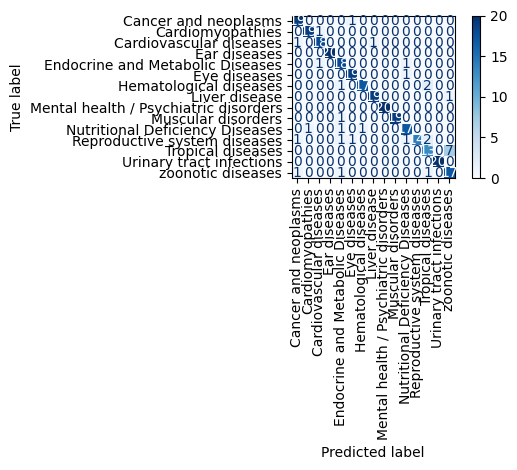


Saved best model to: common_group_best_model.joblib


In [35]:
# GRIDSEARCH: Compare imbalance handling + models on Common disease group
import re, warnings, joblib
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, f1_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE

import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# ------------------ Load & minimal clean ------------------
df = pd.read_csv("disease.csv")
df.rename(columns=lambda c: str(c).strip(), inplace=True)

def clean_symptoms(s):
    if not isinstance(s, str): return ""
    s = s.lower()
    s = re.sub(r"[^a-z\s]", " ", s)
    return re.sub(r"\s+", " ", s).strip()

if "Symptoms_clean" not in df.columns:
    df["Symptoms_clean"] = df["Symptoms"].fillna("").apply(clean_symptoms)

def normalize_common_group(s):
    if pd.isna(s): return s
    t = str(s).strip()
    if t.lower() == "tropical diseases": return "Tropical diseases"
    return t

df["Common disease group"] = df["Common disease group"].apply(normalize_common_group)

X = df["Symptoms_clean"]
y = df["Common disease group"].astype(str).str.strip()

# Train/test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------ Base pipeline ------------------
# We allow SVD and sampler to be set to 'passthrough' in the grid.
base = ImbPipeline(steps=[
    ("tfidf", TfidfVectorizer()),
    ("svd",   "passthrough"),           # TruncatedSVD for SMOTE only
    ("scaler","passthrough"),           # Standardize after SVD (dense)
    ("sampler","passthrough"),          # RandomOverSampler or SMOTE
    ("clf",   LogisticRegression())     # placeholder, replaced in grid
])

# ------------------ Parameter grids ------------------
# 1) Logistic Regression variants
# (a) class_weight only (no sampler, no svd)
grid_lr_weight = {
    "clf": [LogisticRegression(max_iter=2000, class_weight="balanced", n_jobs=None)],
    "tfidf__ngram_range": [(1,1), (1,2)],
    "tfidf__max_features": [20000, 30000, 50000],
    "sampler": ["passthrough"],
    "svd": ["passthrough"],
    "clf__C": [0.5, 1.0, 2.0],
}

# (b) RandomOverSampler (no svd)
grid_lr_ros = {
    "clf": [LogisticRegression(max_iter=2000, class_weight="balanced", n_jobs=None)],
    "tfidf__ngram_range": [(1,1), (1,2)],
    "tfidf__max_features": [20000, 30000],
    "sampler": [RandomOverSampler(random_state=42)],
    "svd": ["passthrough"],
    "clf__C": [0.5, 1.0, 2.0],
}

# (c) SMOTE + SVD (SMOTE requires dense)
grid_lr_smote = {
    "clf": [LogisticRegression(max_iter=2000, class_weight="balanced", n_jobs=None)],
    "tfidf__ngram_range": [(1,1), (1,2)],
    "tfidf__max_features": [20000, 30000],
    "svd": [TruncatedSVD(n_components=200, random_state=42),
            TruncatedSVD(n_components=300, random_state=42)],
    "scaler": [StandardScaler(with_mean=False)],
    "sampler": [SMOTE(random_state=42)],
    "clf__C": [0.5, 1.0, 2.0],
}

# 2) Decision Tree (try class_weight via sample_weight behavior; no sampler vs ROS vs SMOTE)
# Note: tree 'class_weight' exists only in some SKL versions for classifier; if unsupported, remove it.
grid_dt_weight = {
    "clf": [DecisionTreeClassifier(random_state=42, class_weight="balanced")],
    "tfidf__ngram_range": [(1,1), (1,2)],
    "tfidf__max_features": [20000, 30000],
    "sampler": ["passthrough"],
    "svd": ["passthrough"],
    "clf__max_depth": [None, 20, 40],
    "clf__min_samples_leaf": [1, 2, 5],
}

grid_dt_ros = {
    "clf": [DecisionTreeClassifier(random_state=42, class_weight="balanced")],
    "tfidf__ngram_range": [(1,1), (1,2)],
    "tfidf__max_features": [20000, 30000],
    "sampler": [RandomOverSampler(random_state=42)],
    "svd": ["passthrough"],
    "clf__max_depth": [None, 20, 40],
    "clf__min_samples_leaf": [1, 2, 5],
}

grid_dt_smote = {
    "clf": [DecisionTreeClassifier(random_state=42, class_weight="balanced")],
    "tfidf__ngram_range": [(1,1), (1,2)],
    "tfidf__max_features": [20000, 30000],
    "svd": [TruncatedSVD(n_components=200, random_state=42),
            TruncatedSVD(n_components=300, random_state=42)],
    "scaler": [StandardScaler(with_mean=False)],
    "sampler": [SMOTE(random_state=42)],
    "clf__max_depth": [None, 20, 40],
    "clf__min_samples_leaf": [1, 2, 5],
}

# 3) Random Forest (with class_weight, try no sampler vs ROS vs SMOTE)
grid_rf_weight = {
    "clf": [RandomForestClassifier(
        n_estimators=400, random_state=42, n_jobs=-1, class_weight="balanced"
    )],
    "tfidf__ngram_range": [(1,1), (1,2)],
    "tfidf__max_features": [20000, 30000],
    "sampler": ["passthrough"],
    "svd": ["passthrough"],
    "clf__max_depth": [None, 40],
    "clf__min_samples_leaf": [1, 2, 5],
}

grid_rf_ros = {
    "clf": [RandomForestClassifier(
        n_estimators=400, random_state=42, n_jobs=-1, class_weight="balanced"
    )],
    "tfidf__ngram_range": [(1,1), (1,2)],
    "tfidf__max_features": [20000, 30000],
    "sampler": [RandomOverSampler(random_state=42)],
    "svd": ["passthrough"],
    "clf__max_depth": [None, 40],
    "clf__min_samples_leaf": [1, 2, 5],
}

grid_rf_smote = {
    "clf": [RandomForestClassifier(
        n_estimators=400, random_state=42, n_jobs=-1, class_weight="balanced"
    )],
    "tfidf__ngram_range": [(1,1), (1,2)],
    "tfidf__max_features": [20000, 30000],
    "svd": [TruncatedSVD(n_components=200, random_state=42),
            TruncatedSVD(n_components=300, random_state=42)],
    "scaler": [StandardScaler(with_mean=False)],
    "sampler": [SMOTE(random_state=42)],
    "clf__max_depth": [None, 40],
    "clf__min_samples_leaf": [1, 2, 5],
}

param_grids = [
    grid_lr_weight, grid_lr_ros, grid_lr_smote,
    grid_dt_weight, grid_dt_ros, grid_dt_smote,
    grid_rf_weight, grid_rf_ros, grid_rf_smote
]

# ------------------ Grid search ------------------
gs = GridSearchCV(
    estimator=base,
    param_grid=param_grids,
    cv=3,
    scoring="f1_macro",
    n_jobs=-1,
    verbose=2
)

gs.fit(X_train, y_train)

print("\nBest CV macro-F1:", gs.best_score_)
print("Best params:\n", gs.best_params_)

best_model = gs.best_estimator_

# ------------------ Evaluate on held-out test ------------------
y_pred = best_model.predict(X_test)
print("\n=== TEST METRICS (Common disease group) ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Macro F1:", f1_score(y_test, y_pred, average="macro"))
print("\nClassification report:\n", classification_report(y_test, y_pred, zero_division=0))

# Confusion matrix (optional)
try:
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation=90, cmap="Blues")
    plt.tight_layout()
    plt.show()
except Exception as e:
    print("Could not plot confusion matrix:", e)

# ------------------ Save best model ------------------
joblib.dump(best_model, "common_group_best_model.joblib")
print("\nSaved best model to: common_group_best_model.joblib")


In [2]:
# Step 3: Training and evaluating different models (full, self-contained)

# ---------------------- Imports ----------------------
import re
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# ---------------------- Load & Prepare Data ----------------------
# Change the path if needed
DATA_PATH = "disease.csv"

# Read CSV
df = pd.read_csv(DATA_PATH)
df.rename(columns=lambda c: str(c).strip(), inplace=True)

# Ensure required columns exist
required_cols = {"Symptoms", "Common disease group"}
missing = required_cols - set(df.columns)
if missing:
    raise ValueError(f"Missing required column(s): {', '.join(missing)}")

# Basic clean for text column
def clean_symptoms(s):
    if not isinstance(s, str):
        return ""
    s = s.lower()
    s = re.sub(r"[^a-z\s]", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

df["Symptoms_clean"] = df["Symptoms"].fillna("").map(clean_symptoms)
df["Common disease group"] = df["Common disease group"].astype(str).str.strip()

# Drop rows with empty text or empty labels (if any)
df = df[(df["Symptoms_clean"] != "") & (df["Common disease group"] != "")]
if df.empty:
    raise ValueError("No usable rows after cleaning. Check your data.")

X = df["Symptoms_clean"]
y = df["Common disease group"]

# ---------------------- Train/Test Split ----------------------
# Try stratified split; if a class has 1 sample it can fail, so we fallback gracefully
try:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
except ValueError:
    # Fallback without stratify (not ideal, but avoids crashing on tiny classes)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    print("⚠️ Stratified split failed due to tiny class counts. Used non-stratified split.")

# ---------------------- Models to Compare ----------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, n_jobs=None),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# You can tweak TF-IDF if you want: ngram_range=(1,2), min_df=2, etc.
vectorizer = TfidfVectorizer()  # simple & solid default

# ---------------------- Train, Predict, Report ----------------------
results = []

for name, clf in models.items():
    pipe = Pipeline([
        ("tfidf", vectorizer),
        ("clf", clf)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))

    print("="*70)
    print(f"{name} — Test Accuracy: {acc:.2%}")
    print("-"*70)
    # Macro-F1 treats each class equally; micro-F1 mirrors accuracy in single-label tasks
    print(classification_report(y_test, y_pred, digits=3))
    print()

# ---------------------- Summary ----------------------
results.sort(key=lambda x: x[1], reverse=True)
print("="*70)
print("Summary (sorted by accuracy):")
for name, acc in results:
    print(f"{name}: {acc:.2%}")


Logistic Regression — Test Accuracy: 89.33%
----------------------------------------------------------------------
                                       precision    recall  f1-score   support

                 Cancer and neoplasms      0.864     0.950     0.905        20
                     Cardiomyopathies      0.950     0.950     0.950        20
              Cardiovascular diseases      0.900     0.900     0.900        20
                         Ear diseases      1.000     1.000     1.000        20
     Endocrine and Metabolic Diseases      0.783     0.900     0.837        20
                         Eye diseases      0.864     0.950     0.905        20
               Hematological diseases      0.944     0.850     0.895        20
                        Liver disease      0.950     0.950     0.950        20
Mental health / Psychiatric disorders      1.000     1.000     1.000        20
                   Muscular disorders      1.000     0.950     0.974        20
      Nutrition

In [3]:
# Training vs Test Accuracy for Multiple Models (full, self-contained)

# ---------------------- Imports ----------------------
import re
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# ---------------------- Load & Prepare Data ----------------------
DATA_PATH = "disease.csv"  # change if needed

df = pd.read_csv(DATA_PATH)
df.rename(columns=lambda c: str(c).strip(), inplace=True)

# Ensure required columns exist
required_cols = {"Symptoms", "Common disease group"}
missing = required_cols - set(df.columns)
if missing:
    raise ValueError(f"Missing required column(s): {', '.join(missing)}")

# Basic cleaning for symptoms text
def clean_symptoms(s):
    if not isinstance(s, str):
        return ""
    s = s.lower()
    s = re.sub(r"[^a-z\s]", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

df["Symptoms_clean"] = df["Symptoms"].fillna("").map(clean_symptoms)
df["Common disease group"] = df["Common disease group"].astype(str).str.strip()

# Drop unusable rows if any
df = df[(df["Symptoms_clean"] != "") & (df["Common disease group"] != "")]
if df.empty:
    raise ValueError("No usable rows after cleaning. Check your data contents.")

X = df["Symptoms_clean"]
y = df["Common disease group"]

# ---------------------- Train/Test Split ----------------------
try:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
except ValueError:
    # Fallback if some classes are too tiny for stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    print("⚠️ Stratified split failed due to tiny class counts. Used non-stratified split.")

# ---------------------- Models & Vectorizer ----------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
}

# TF-IDF config (tweak if you like: e.g., ngram_range=(1,2), min_df=2)
vectorizer = TfidfVectorizer()

# ---------------------- Train, Predict, Report ----------------------
results = []

for name, clf in models.items():
    pipe = Pipeline([
        ("tfidf", vectorizer),
        ("clf", clf)
    ])

    # Train
    pipe.fit(X_train, y_train)

    # Predict on train & test
    y_train_pred = pipe.predict(X_train)
    y_test_pred  = pipe.predict(X_test)

    # Accuracies
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc  = accuracy_score(y_test, y_test_pred)
    results.append((name, train_acc, test_acc))

    # Reports
    print("="*72)
    print(f"{name}")
    print(f"  Training Accuracy: {train_acc:.2%}")
    print(f"  Test Accuracy:     {test_acc:.2%}")
    print("-"*72)
    print("Classification Report (Test):")
    print(classification_report(y_test, y_test_pred, digits=3))
    print()

# ---------------------- Summary ----------------------
print("="*72)
print("Summary of accuracies (Train vs Test):")
for name, tr, te in sorted(results, key=lambda x: x[2], reverse=True):
    print(f"{name}: Train={tr:.2%}, Test={te:.2%}")

# ---------------------- Tips ----------------------
# If you see high Train but low Test => likely overfitting.
# Try: TfidfVectorizer(ngram_range=(1,2), min_df=2) and tune LogisticRegression C,
# or limit RandomForest depth (max_depth) to improve generalization.


Logistic Regression
  Training Accuracy: 95.58%
  Test Accuracy:     89.33%
------------------------------------------------------------------------
Classification Report (Test):
                                       precision    recall  f1-score   support

                 Cancer and neoplasms      0.864     0.950     0.905        20
                     Cardiomyopathies      0.950     0.950     0.950        20
              Cardiovascular diseases      0.900     0.900     0.900        20
                         Ear diseases      1.000     1.000     1.000        20
     Endocrine and Metabolic Diseases      0.783     0.900     0.837        20
                         Eye diseases      0.864     0.950     0.905        20
               Hematological diseases      0.944     0.850     0.895        20
                        Liver disease      0.950     0.950     0.950        20
Mental health / Psychiatric disorders      1.000     1.000     1.000        20
                   Muscular di

In [11]:
# Inspect CSV, create/refresh `symptoms_clean` & `dosha_clean`, and save

import re
import os
import pandas as pd
from datetime import datetime

CSV_PATH = "disease.csv"  # <-- change if your file is elsewhere

# ---------------------- Helper functions ----------------------
def normalize_header(name: str) -> str:
    """Lowercase + collapse spaces for robust column lookup."""
    name = str(name).strip().lower()
    name = re.sub(r"\s+", " ", name)
    return name

def find_col(df: pd.DataFrame, candidates) -> str | None:
    """
    Return the first existing column from `candidates` ignoring case/extra spaces.
    """
    # Build mapping from normalized -> original
    norm2orig = {normalize_header(c): c for c in df.columns}
    for cand in candidates:
        c_norm = normalize_header(cand)
        if c_norm in norm2orig:
            return norm2orig[c_norm]
    return None

def clean_symptoms_text(s: str) -> str:
    """Lowercase, keep letters/spaces, collapse whitespace."""
    if not isinstance(s, str):
        return ""
    s = s.lower()
    s = re.sub(r"[^a-z\s]", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

def normalize_dosha(value: str) -> str:
    """
    Normalize dosha strings into canonical forms like:
      - 'vata', 'pitta', 'kapha'
      - 'vata|pitta', 'vata|kapha', 'pitta|kapha'
      - 'vata|pitta|kapha' (tridosha)
    Accepts messy inputs like 'Vata-Pitta', 'Tridosha', 'kapha , vata', etc.
    """
    if not isinstance(value, str):
        return ""

    s = value.lower().strip()
    # map 'tridosha' to all three
    if "tridosha" in s:
        return "vata|pitta|kapha"

    # split on ANY non-letter to capture commas, pipes, slashes, etc.
    parts = [p for p in re.split(r"[^a-z]+", s) if p]
    # keep only recognized tokens
    keep = []
    for p in parts:
        if p in {"vata", "pitta", "kapha"}:
            keep.append(p)

    # unique + canonical order (vata, pitta, kapha)
    ordered = []
    for k in ["vata", "pitta", "kapha"]:
        if k in keep:
            ordered.append(k)

    return "|".join(ordered)

# ---------------------- Load CSV ----------------------
if not os.path.exists(CSV_PATH):
    raise FileNotFoundError(f"CSV not found at: {CSV_PATH}")

df = pd.read_csv(CSV_PATH)

print("🔎 Columns in your CSV:")
print(df.columns.tolist())

# ---------------------- Locate needed source columns ----------------------
symptoms_col = find_col(df, ["Symptoms", "Symptom", "symptoms_text"])
dosha_col    = find_col(df, ["Dosha Types", "Dosha Type", "Dosha", "dosha_types"])

if symptoms_col is None:
    raise ValueError(
        "Couldn't find a symptoms column. Tried: ['Symptoms', 'Symptom', 'symptoms_text'].\n"
        f"Available columns: {list(df.columns)}"
    )

if dosha_col is None:
    print("⚠️ No dosha column found. I will create `dosha_clean` as empty.")
else:
    print(f"✅ Using dosha source column: {dosha_col}")

print(f"✅ Using symptoms source column: {symptoms_col}")

# ---------------------- Create/refresh clean columns ----------------------
df["symptoms_clean"] = df[symptoms_col].fillna("").map(clean_symptoms_text)

if dosha_col is not None:
    df["dosha_clean"] = df[dosha_col].fillna("").map(normalize_dosha)
else:
    # If missing, still ensure the column exists (empty)
    df["dosha_clean"] = ""

# ---------------------- Quick sanity checks ----------------------
print("\n📌 Preview of cleaned columns:")
print(df[["symptoms_clean", "dosha_clean"]].head())

print("\n✅ Non-empty counts:")
print({
    "symptoms_clean_non_empty": int((df["symptoms_clean"].str.len() > 0).sum()),
    "dosha_clean_non_empty": int((df["dosha_clean"].str.len() > 0).sum())
})

# ---------------------- Backup & Save ----------------------
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
backup_path = f"disease_backup_{timestamp}.csv"

# Make a safe backup (once per run)
df.to_csv(backup_path, index=False)
print(f"\n💾 Backup saved to: {backup_path}")

# Overwrite main CSV with the new/updated clean columns
df.to_csv(CSV_PATH, index=False)
print(f"💾 Updated CSV saved to: {CSV_PATH}")

print("\n🎉 Done! `symptoms_clean` and `dosha_clean` are now present in your CSV.")


🔎 Columns in your CSV:
['Disease', 'Common disease group', 'Symptoms', 'Disease Group', 'Dosha Types', 'symptoms_clean', 'dosha_clean']
✅ Using dosha source column: Dosha Types
✅ Using symptoms source column: Symptoms

📌 Preview of cleaned columns:
                                      symptoms_clean       dosha_clean
0  burning urination pain during urination dysuri...  vata|pitta|kapha
1  burning urination frequent urination urgency s...  vata|pitta|kapha
2  chronic pelvic pain bladder pressure frequent ...        vata|pitta
3  high fever chills flank pain nausea vomiting b...  vata|pitta|kapha
4  vague flank abdominal pain malaise recurrent f...  vata|pitta|kapha

✅ Non-empty counts:
{'symptoms_clean_non_empty': 1500, 'dosha_clean_non_empty': 1500}

💾 Backup saved to: disease_backup_20251001_092952.csv
💾 Updated CSV saved to: disease.csv

🎉 Done! `symptoms_clean` and `dosha_clean` are now present in your CSV.


In [12]:
# ==== DOSHA CLEAN classification with LR, RF, DT ====

import re, warnings
warnings.filterwarnings("ignore")

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

DATA_PATH = "disease.csv"

# ---------------------- Load & prepare ----------------------
df = pd.read_csv(DATA_PATH)
df.rename(columns=lambda c: str(c).strip(), inplace=True)

if "symptoms_clean" not in df.columns or "dosha_clean" not in df.columns:
    raise ValueError("Expected 'symptoms_clean' and 'dosha_clean' columns missing!")

X = df["symptoms_clean"].fillna("")
y = df["dosha_clean"].astype(str).str.strip()

# Drop empty rows if any
mask = (X.str.len() > 0) & (y != "")
df2 = pd.DataFrame({"x": X[mask], "y": y[mask]})
X = df2["x"]
y = df2["y"]

# ---------------------- Train/Test Split ----------------------
try:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
except ValueError:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    print("⚠️ Stratified split failed. Using non-stratified split.")

# ---------------------- Models ----------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
}
vectorizer = TfidfVectorizer()

# ---------------------- Train & Report ----------------------
results = []

for name, clf in models.items():
    pipe = Pipeline([("tfidf", vectorizer), ("clf", clf)])
    pipe.fit(X_train, y_train)

    y_train_pred = pipe.predict(X_train)
    y_test_pred  = pipe.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc  = accuracy_score(y_test, y_test_pred)
    results.append((name, train_acc, test_acc))

    print("="*72)
    print(f"{name}  (target = 'dosha_clean')")
    print(f"  Training Accuracy: {train_acc:.2%}")
    print(f"  Test Accuracy:     {test_acc:.2%}")
    print("-"*72)
    print("Classification Report (Test):")
    print(classification_report(y_test, y_test_pred, digits=3))
    print()

# ---------------------- Summary ----------------------
print("="*72)
print("Summary for dosha_clean (Train vs Test):")
for name, tr, te in sorted(results, key=lambda x: x[2], reverse=True):
    print(f"{name}: Train={tr:.2%}, Test={te:.2%}")


Logistic Regression  (target = 'dosha_clean')
  Training Accuracy: 80.08%
  Test Accuracy:     61.67%
------------------------------------------------------------------------
Classification Report (Test):
                  precision    recall  f1-score   support

           kapha      1.000     0.300     0.462        20
           pitta      0.611     0.714     0.659        77
     pitta|kapha      0.000     0.000     0.000        13
            vata      0.587     0.831     0.688        89
      vata|kapha      0.938     0.484     0.638        31
      vata|pitta      0.429     0.375     0.400        48
vata|pitta|kapha      0.850     0.773     0.810        22

        accuracy                          0.617       300
       macro avg      0.631     0.497     0.522       300
    weighted avg      0.626     0.617     0.593       300


Random Forest  (target = 'dosha_clean')
  Training Accuracy: 99.58%
  Test Accuracy:     61.33%
---------------------------------------------------------

In [38]:
import joblib
import pandas as pd

# Load
pipe = joblib.load("common_group_best_model.joblib")

# Example: batch predict on the whole dataset (or a holdout csv)
df = pd.read_csv("disease.csv")
def clean_symptoms(s):
    import re
    if not isinstance(s, str): return ""
    s = s.lower()
    s = re.sub(r"[^a-z\s]", " ", s)
    return re.sub(r"\s+", " ", s).strip()

if "Symptoms_clean" not in df.columns:
    df["Symptoms_clean"] = df["Symptoms"].fillna("").apply(clean_symptoms)

y_true = df["Common disease group"].astype(str).str.strip()
y_pred = pipe.predict(df["Symptoms_clean"])

print("Sample predictions:")
print(pd.DataFrame({"true": y_true.head(10), "pred": y_pred[:10]}))
def predict_common_group(symptoms: str, top_k: int = 3):
    import numpy as np
    s = clean_symptoms(symptoms)
    probs = None
    if hasattr(pipe, "predict_proba"):
        probs = pipe.predict_proba([s])[0]              # not all models support this
        classes = pipe.named_steps["clf"].classes_
        top_idx = probs.argsort()[::-1][:top_k]
        return list(zip(classes[top_idx], probs[top_idx]))
    # fallback if no predict_proba (e.g., LinearSVC)
    pred = pipe.predict([s])[0]
    return [(pred, 1.0)]

print(predict_common_group("burning urination, fever, lower abdominal pain"))


Sample predictions:
                       true                      pred
0  Urinary tract infections  Urinary tract infections
1  Urinary tract infections  Urinary tract infections
2  Urinary tract infections  Urinary tract infections
3  Urinary tract infections  Urinary tract infections
4  Urinary tract infections  Urinary tract infections
5  Urinary tract infections  Urinary tract infections
6  Urinary tract infections  Urinary tract infections
7  Urinary tract infections  Urinary tract infections
8  Urinary tract infections  Urinary tract infections
9  Urinary tract infections  Urinary tract infections
[('Urinary tract infections', np.float64(0.6342343860738059)), ('Tropical diseases', np.float64(0.10418462164880385)), ('zoonotic diseases', np.float64(0.06606402200592966))]


In [39]:
# === A1) Save class list for stable label order ===
import json
classes = best_model.named_steps["clf"].classes_.tolist()
with open("common_group_classes.json", "w") as f:
    json.dump(classes, f, indent=2)
print("Saved -> common_group_classes.json")

Saved -> common_group_classes.json


In [41]:
# === A2) Export full CV results + final test report + confusion matrix (CSV/PNG) ===
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Use the cv results from your GridSearchCV
cv = pd.DataFrame(gs.cv_results_)
cv.to_csv("common_group_gridsearch_results.csv", index=False)

# Make sure we use the multiclass predictions from the best grid model
# and NOT any multi-label predictions from other code cells.
y_pred_common = best_model.predict(X_test)              # 1-D array of labels
y_test_common = y_test                                  # keep naming clear

# Safety check
assert len(y_test_common) == len(y_pred_common), \
    f"Length mismatch: y_test={len(y_test_common)}, y_pred={len(y_pred_common)}"

# Define class order for reports/CM
classes = np.unique(np.concatenate([np.asarray(y_train), np.asarray(y_test_common)]))

# Test report
report_dict = classification_report(
    y_test_common, y_pred_common, labels=classes, output_dict=True, zero_division=0
)
pd.DataFrame(report_dict).to_csv("common_group_test_classification_report.csv")

# Confusion matrix
cm = confusion_matrix(y_test_common, y_pred_common, labels=classes)
pd.DataFrame(cm, index=classes, columns=classes).to_csv("common_group_confusion_matrix.csv")

# Pretty PNG
fig, ax = plt.subplots(figsize=(9, 9))
disp = ConfusionMatrixDisplay(cm, display_labels=classes)
disp.plot(ax=ax, xticks_rotation=90, cmap="Blues", colorbar=False)
plt.tight_layout()
plt.savefig("common_group_confusion_matrix.png", dpi=200)
plt.close(fig)

print("Saved: gridsearch CSV, test report CSV, confusion matrix CSV/PNG")


Saved: gridsearch CSV, test report CSV, confusion matrix CSV/PNG


In [44]:
# Use the predictions from your Common-group grid search
y_pred_common = best_model.predict(X_test)   # 1-D, length == len(y_test)

# Ensure everything lines up (convert to Series and align lengths)
X_test_common = pd.Series(X_test).reset_index(drop=True)
y_test_common = pd.Series(y_test).reset_index(drop=True)
y_pred_common = pd.Series(y_pred_common).reset_index(drop=True)

errs = pd.DataFrame({
    "symptoms": X_test_common,
    "true":     y_test_common,
    "pred":     y_pred_common
})

confused = (errs[errs.true != errs.pred]
            .groupby(["true", "pred"])
            .size()
            .sort_values(ascending=False)
            .head(25))

print(confused)
confused.to_csv("common_group_top_confusions.csv", header=["count"])


true                                   pred                            
Tropical diseases                      zoonotic diseases                   7
Nutritional Deficiency Diseases        Cardiovascular diseases             2
Reproductive system diseases           Endocrine and Metabolic Diseases    2
Nutritional Deficiency Diseases        Endocrine and Metabolic Diseases    2
zoonotic diseases                      Tropical diseases                   2
Endocrine and Metabolic Diseases       Eye diseases                        1
                                       Hematological diseases              1
                                       Liver disease                       1
Cancer and neoplasms                   Eye diseases                        1
Cardiomyopathies                       Cardiovascular diseases             1
Cardiovascular diseases                Cardiomyopathies                    1
                                       Tropical diseases                   1
Endo

In [45]:
# Assuming you have: Y_test (np array shape [n,3]), Y_prob, Y_pred (0/1 ints), and label order:
dosha_labels = ["vata","pitta","kapha"]
X_test_dosha = pd.Series(X_test).reset_index(drop=True)  # or df.loc[test_idx, "Symptoms_clean"]

# 1) Per-label confusion counts
rows = []
for j, lbl in enumerate(dosha_labels):
    y_t = Y_test[:, j].astype(int)
    y_p = Y_pred[:, j].astype(int)
    tp = int(((y_t == 1) & (y_p == 1)).sum())
    fp = int(((y_t == 0) & (y_p == 1)).sum())
    fn = int(((y_t == 1) & (y_p == 0)).sum())
    tn = int(((y_t == 0) & (y_p == 0)).sum())
    rows.append({"label": lbl, "TP": tp, "FP": fp, "FN": fn, "TN": tn})
dosha_conf = pd.DataFrame(rows).sort_values("FN", ascending=False)
print(dosha_conf)
dosha_conf.to_csv("dosha_label_confusions.csv", index=False)

# 2) Example misclassified texts per label (top a few)
examples = []
for j, lbl in enumerate(dosha_labels):
    y_t = Y_test[:, j].astype(int)
    y_p = Y_pred[:, j].astype(int)
    # false negatives: should have lbl but model missed it
    for idx in np.where((y_t == 1) & (y_p == 0))[0][:10]:
        examples.append({"label": lbl, "type": "FN", "symptoms": X_test_dosha.iloc[idx]})
    # false positives: predicted lbl but it isn't present
    for idx in np.where((y_t == 0) & (y_p == 1))[0][:10]:
        examples.append({"label": lbl, "type": "FP", "symptoms": X_test_dosha.iloc[idx]})

examples_df = pd.DataFrame(examples)
print(examples_df.head(20))
examples_df.to_csv("dosha_misclassified_examples.csv", index=False)


   label   TP  FP  FN   TN
0   vata  134  25  46   95
1  pitta  132  24  35  109
2  kapha   66  28  23  183
   label type                                           symptoms
0   vata   FN  redness mild discomfort foreign body sensation...
1   vata   FN  muscle weakness pain cramps elevated ck possib...
2   vata   FN  incomplete awakenings confusion ambulation scr...
3   vata   FN  chronic pelvic pain abnormal menstrual bleedin...
4   vata   FN  sudden onset jaundice abdominal pain nausea vo...
5   vata   FN  obsessions compulsions checking washing counti...
6   vata   FN  hypertension proteinuria edema headaches blurr...
7   vata   FN  kidney stones bone pain abdominal pain psychia...
8   vata   FN  warm extremities bounding pulses tachycardia w...
9   vata   FN  systemic symptoms fever weight loss malaise ab...
10  vata   FP  peripheral vision loss tunnel vision late halo...
11  vata   FP  excessive bleeding after childbirth dizziness ...
12  vata   FP  exertional dyspnea fatigue palpi

In [46]:
# fine_group_baseline.py
import re, joblib, numpy as np, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, f1_score, accuracy_score

# --- Load ---
df = pd.read_csv("disease.csv")
df.rename(columns=lambda c: str(c).strip(), inplace=True)

# --- Clean text ---
def clean_symptoms(s):
    if not isinstance(s, str): return ""
    s = s.lower()
    s = re.sub(r"[^a-z\s]", " ", s)
    return re.sub(r"\s+", " ", s).strip()

if "Symptoms_clean" not in df.columns:
    df["Symptoms_clean"] = df["Symptoms"].fillna("").apply(clean_symptoms)

# --- Target = fine-grained "Disease Group" (very sparse) ---
y_raw = (df["Disease Group"].astype(str)
         .str.strip()
         .str.replace(r"\s+", " ", regex=True))

# Collapse rare classes to keep things learnable
def collapse_rare_classes(y_series: pd.Series, min_count: int = 5) -> pd.Series:
    counts = y_series.value_counts()
    rare = counts[counts < min_count].index
    return y_series.where(~y_series.isin(rare), other="Other")

y = collapse_rare_classes(y_raw, min_count=5)
X = df["Symptoms_clean"]

# Sanity check
print("Label counts (after collapse):")
print(y.value_counts().head(20))

# --- Split (stratified) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Pipeline: TF-IDF -> LR(balanced) ---
pipe = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=30000, ngram_range=(1,2))),
    ("clf",   LogisticRegression(max_iter=2000, class_weight="balanced", n_jobs=None, multi_class="ovr"))
])

pipe.fit(X_train, y_train)

# --- Evaluate ---
y_pred = pipe.predict(X_test)

print("\n=== Fine-grained Disease Group (collapsed) ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Macro F1:", f1_score(y_test, y_pred, average="macro"))
print("Weighted F1:", f1_score(y_test, y_pred, average="weighted"))
print("\nReport:\n", classification_report(y_test, y_pred, zero_division=0))

# --- Top-K accuracy (K=3) if proba available ---
def topk_accuracy(model, X_text, y_true, k=3):
    if hasattr(model.named_steps["clf"], "predict_proba"):
        probs = model.predict_proba(X_text)
        classes = model.named_steps["clf"].classes_
        class_to_idx = {c:i for i,c in enumerate(classes)}
        correct = 0
        for i, true_lab in enumerate(y_true):
            true_idx = class_to_idx.get(true_lab, None)
            if true_idx is None: 
                continue
            top_k = np.argsort(probs[i])[::-1][:k]
            if true_idx in top_k:
                correct += 1
        return correct / len(y_true)
    return None

tk3 = topk_accuracy(pipe, X_test, y_test, k=3)
if tk3 is not None:
    print(f"Top-3 Accuracy: {tk3:.3f}")
else:
    print("Top-3 Accuracy: (predict_proba not available for this classifier)")

# --- Save artifacts ---
joblib.dump(pipe, "fine_group_baseline_lr.joblib")
pd.Series(pipe.named_steps["clf"].classes_).to_csv("fine_group_label_list.csv", index=False)
print("\nSaved: fine_group_baseline_lr.joblib, fine_group_label_list.csv")


Label counts (after collapse):
Disease Group
Other                                                  1214
Muscular dystrophy                                       16
Congenital heart disease                                 14
Infectious disease                                       10
Cancer (Head and neck)                                   10
Congenital myopathy                                      10
Metabolic myopathy                                        9
Valvular heart disease                                    9
Metabolic disorders (Lipid disorder)                      9
Eye diseases (Retinal disorder)                           8
Metabolic disease                                         8
Cancer (Gastrointestinal)                                 7
Metabolic/genetic disorder                                7
Parasitic diseases (Helminthic; nematode infection)       7
Arrhythmia                                                7
Inflammatory myopathy                                  

In [47]:
# fine_group_gridsearch.py
import re, warnings, joblib, numpy as pd
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, f1_score, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE

warnings.filterwarnings("ignore")

# --- Load + clean ---
df = pd.read_csv("disease.csv")
df.rename(columns=lambda c: str(c).strip(), inplace=True)

def clean_symptoms(s):
    if not isinstance(s, str): return ""
    s = s.lower()
    s = re.sub(r"[^a-z\s]", " ", s)
    return re.sub(r"\s+", " ", s).strip()

if "Symptoms_clean" not in df.columns:
    df["Symptoms_clean"] = df["Symptoms"].fillna("").apply(clean_symptoms)

# --- Target collapse ---
def collapse_rare_classes(y_series: pd.Series, min_count: int = 5) -> pd.Series:
    counts = y_series.value_counts()
    rare = counts[counts < min_count].index
    return y_series.where(~y_series.isin(rare), other="Other")

y = (df["Disease Group"].astype(str).str.strip().str.replace(r"\s+", " ", regex=True))
y = collapse_rare_classes(y, min_count=5)
X = df["Symptoms_clean"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Base pipeline ---
base = ImbPipeline(steps=[
    ("tfidf", TfidfVectorizer()),
    ("svd",   "passthrough"),
    ("scaler","passthrough"),
    ("sampler","passthrough"),
    ("clf",   LogisticRegression(max_iter=2000, class_weight="balanced"))
])

grid_lr_weight = {
    "tfidf__ngram_range": [(1,1), (1,2)],
    "tfidf__max_features": [20000, 30000],
    "sampler": ["passthrough"],
    "svd": ["passthrough"],
    "clf__C": [0.5, 1.0, 2.0],
}

grid_lr_ros = {
    "tfidf__ngram_range": [(1,1), (1,2)],
    "tfidf__max_features": [20000, 30000],
    "sampler": [RandomOverSampler(random_state=42)],
    "svd": ["passthrough"],
    "clf__C": [0.5, 1.0, 2.0],
}

grid_lr_smote = {
    "tfidf__ngram_range": [(1,1), (1,2)],
    "tfidf__max_features": [20000, 30000],
    "svd": [TruncatedSVD(n_components=200, random_state=42)],
    "scaler": [StandardScaler(with_mean=False)],
    "sampler": [SMOTE(random_state=42)],
    "clf__C": [0.5, 1.0, 2.0],
}

param_grids = [grid_lr_weight, grid_lr_ros, grid_lr_smote]

gs = GridSearchCV(
    estimator=base,
    param_grid=param_grids,
    cv=3,
    scoring="f1_macro",
    n_jobs=-1,
    verbose=2
)
gs.fit(X_train, y_train)

print("Best CV macro-F1:", gs.best_score_)
print("Best params:", gs.best_params_)

best_model = gs.best_estimator_

y_pred = best_model.predict(X_test)
print("\n=== TEST METRICS (Fine-grained Disease Group) ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Macro F1:", f1_score(y_test, y_pred, average="macro"))
print("Weighted F1:", f1_score(y_test, y_pred, average="weighted"))
print("\nReport:\n", classification_report(y_test, y_pred, zero_division=0))

# Save artifacts & CV
joblib.dump(best_model, "fine_group_best_model.joblib")
pd.DataFrame(gs.cv_results_).to_csv("fine_group_gridsearch_results.csv", index=False)
print("\nSaved: fine_group_best_model.joblib, fine_group_gridsearch_results.csv")


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best CV macro-F1: 0.4806714565902894
Best params: {'clf__C': 0.5, 'sampler': RandomOverSampler(random_state=42), 'svd': 'passthrough', 'tfidf__max_features': 20000, 'tfidf__ngram_range': (1, 1)}

=== TEST METRICS (Fine-grained Disease Group) ===
Accuracy: 0.8433333333333334
Macro F1: 0.49544951172858154
Weighted F1: 0.8425223665223665

Report:
                                                        precision    recall  f1-score   support

                                           Arrhythmia       1.00      1.00      1.00         1
                                        Bacterial UTI       0.25      1.00      0.40         1
                        Bacterial diseases (Zoonotic)       0.00      0.00      0.00         1
                            Cancer (Gastrointestinal)       0.00      0.00      0.00         1
                               Cancer (Genitourinary)       0.00      0.00      0.00         1
                    

In [49]:
# dosha_multilabel_baseline.py
import re, joblib, numpy as np, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import (classification_report, f1_score,
                             precision_score, recall_score)

# ---------- Load ----------
df = pd.read_csv("disease.csv")
df.rename(columns=lambda c: str(c).strip(), inplace=True)

# ---------- Clean Symptoms ----------
def clean_symptoms(s):
    if not isinstance(s, str): return ""
    s = s.lower()
    s = re.sub(r"[^a-z\s]", " ", s)
    return re.sub(r"\s+", " ", s).strip()

if "Symptoms_clean" not in df.columns:
    df["Symptoms_clean"] = df["Symptoms"].fillna("").apply(clean_symptoms)

# ---------- Normalize Dosha -> "vata|pitta|kapha" ----------
ORDER = {"vata","pitta","kapha"}

def normalize_dosha(x):
    if pd.isna(x): return ""
    s = str(x).strip().lower()
    if "tridosha" in s or re.search(r"\btri\s*dosha\b", s):
        return "vata|pitta|kapha"
    s = re.sub(r"[;,+/]+", "|", s).replace(" ", "")
    s = re.sub(r"[^a-z|]", "", s)
    parts = [p for p in s.split("|") if p in ORDER]
    parts = sorted(set(parts), key=["vata","pitta","kapha"].index)
    if len(parts) == 3:
        return "vata|pitta|kapha"
    return "|".join(parts)

df["Dosha_Clean"] = df["Dosha Types"].apply(normalize_dosha)

def dosha_to_list(s):
    if not s: return []
    return s.split("|")

# Multi-hot targets (fixed class order)
mlb = MultiLabelBinarizer(classes=["vata","pitta","kapha"])
Y = mlb.fit_transform(df["Dosha_Clean"].apply(dosha_to_list)).astype(int)
Y_cols = list(mlb.classes_)  # ["vata","pitta","kapha"]

X = df["Symptoms_clean"]

# ---------- Split ----------
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# ---------- Pipeline: TF-IDF -> OvR(LogReg balanced) ----------
pipe = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=20000, ngram_range=(1,2))),
    ("clf",   OneVsRestClassifier(
        LogisticRegression(max_iter=2000, class_weight="balanced")
    ))
])

pipe.fit(X_train, Y_train)

# ---------- Predict (probabilities + threshold) ----------
# default threshold = 0.5; you can tune per label below
Y_prob = np.vstack([est.predict_proba(pipe.named_steps["tfidf"].transform(X_test))[:,1]
                    for est in pipe.named_steps["clf"].estimators_]).T
Y_pred = (Y_prob >= 0.50).astype(int)

# ---------- Evaluation ----------
print("\n=== Dosha multi-label: Overall metrics ===")
for avg in ["micro","macro","weighted","samples"]:
    print(f"F1-{avg}      :", f1_score(Y_test, Y_pred, average=avg, zero_division=0))
    print(f"Precision-{avg}:", precision_score(Y_test, Y_pred, average=avg, zero_division=0))
    print(f"Recall-{avg}   :", recall_score(Y_test, Y_pred, average=avg, zero_division=0))
    print("-"*40)

print("\n=== Per-label reports ===")
for j, lbl in enumerate(Y_cols):
    print(f"\n-- {lbl.upper()} --")
    print(classification_report(Y_test[:, j], Y_pred[:, j], digits=4, zero_division=0))

# ---------- Simple threshold tuning (per label) ----------
print("\n=== Threshold sweep (per label) ===")
best_thresholds = {}
for j, lbl in enumerate(Y_cols):
    best_f1, best_t = -1.0, 0.50
    for t in [0.50, 0.45, 0.40, 0.35, 0.30]:
        pred_t = (Y_prob[:, j] >= t).astype(int)
        f1 = f1_score(Y_test[:, j], pred_t, zero_division=0)
        if f1 > best_f1:
            best_f1, best_t = f1, t
    best_thresholds[lbl] = best_t
    print(f"{lbl}: best threshold={best_t:.2f}, F1={best_f1:.4f}")

# Apply tuned thresholds
Y_pred_tuned = np.zeros_like(Y_pred)
for j, lbl in enumerate(Y_cols):
    Y_pred_tuned[:, j] = (Y_prob[:, j] >= best_thresholds[lbl]).astype(int)

print("\n=== Overall with tuned thresholds ===")
for avg in ["micro","macro","weighted","samples"]:
    print(f"F1-{avg}:", f1_score(Y_test, Y_pred_tuned, average=avg, zero_division=0))

# ---------- Save artifacts ----------
joblib.dump(pipe, "dosha_ovr_lr.joblib")
joblib.dump(mlb,  "dosha_mlb.joblib")
pd.Series(best_thresholds).to_csv("dosha_thresholds.csv")
print("\nSaved: dosha_ovr_lr.joblib, dosha_mlb.joblib, dosha_thresholds.csv")



=== Dosha multi-label: Overall metrics ===
F1-micro      : 0.7857988165680473
Precision-micro: 0.8117359413202934
Recall-micro   : 0.7614678899082569
----------------------------------------
F1-macro      : 0.7764031362288489
Precision-macro: 0.7970162671085994
Recall-macro   : 0.7588122132763188
----------------------------------------
F1-weighted      : 0.7866811062027048
Precision-weighted: 0.8153558881132273
Recall-weighted   : 0.7614678899082569
----------------------------------------
F1-samples      : 0.7575555555555555
Precision-samples: 0.7872222222222223
Recall-samples   : 0.7694444444444444
----------------------------------------

=== Per-label reports ===

-- VATA --
              precision    recall  f1-score   support

           0     0.6738    0.7917    0.7280       120
           1     0.8428    0.7444    0.7906       180

    accuracy                         0.7633       300
   macro avg     0.7583    0.7681    0.7593       300
weighted avg     0.7752    0.7633    0

In [50]:
# dosha_multilabel_tree_models.py
import re, joblib, numpy as np, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# --- Load + preprocess identical to baseline (reuse functions/columns) ---
df = pd.read_csv("disease.csv")
df.rename(columns=lambda c: str(c).strip(), inplace=True)

def clean_symptoms(s):
    if not isinstance(s, str): return ""
    s = s.lower(); s = re.sub(r"[^a-z\s]", " ", s)
    return re.sub(r"\s+", " ", s).strip()

if "Symptoms_clean" not in df.columns:
    df["Symptoms_clean"] = df["Symptoms"].fillna("").apply(clean_symptoms)

ORDER = {"vata","pitta","kapha"}
def normalize_dosha(x):
    if pd.isna(x): return ""
    s = str(x).strip().lower()
    if "tridosha" in s or re.search(r"\btri\s*dosha\b", s):
        return "vata|pitta|kapha"
    s = re.sub(r"[;,+/]+", "|", s).replace(" ", "")
    s = re.sub(r"[^a-z|]", "", s)
    parts = [p for p in s.split("|") if p in ORDER]
    parts = sorted(set(parts), key=["vata","pitta","kapha"].index)
    if len(parts) == 3: return "vata|pitta|kapha"
    return "|".join(parts)

df["Dosha_Clean"] = df["Dosha Types"].apply(normalize_dosha)
def dosha_to_list(s): return [] if not s else s.split("|")

mlb = MultiLabelBinarizer(classes=["vata","pitta","kapha"])
Y = mlb.fit_transform(df["Dosha_Clean"].apply(dosha_to_list)).astype(int)
X = df["Symptoms_clean"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# --- Random Forest (balanced_subsample) ---
rf_pipe = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=20000, ngram_range=(1,2))),
    ("clf",   OneVsRestClassifier(
        RandomForestClassifier(
            n_estimators=500, max_depth=None, min_samples_leaf=1,
            class_weight="balanced_subsample", n_jobs=-1, random_state=42
        )
    ))
])
rf_pipe.fit(X_train, Y_train)
Y_pred_rf = rf_pipe.predict(X_test)

print("\n=== RF OvR: Overall ===")
for avg in ["micro","macro","weighted","samples"]:
    print(f"F1-{avg}:", f1_score(Y_test, Y_pred_rf, average=avg, zero_division=0))

# --- Decision Tree (balanced) ---
dt_pipe = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=20000, ngram_range=(1,2))),
    ("clf",   OneVsRestClassifier(
        DecisionTreeClassifier(max_depth=None, min_samples_leaf=2, class_weight="balanced", random_state=42)
    ))
])
dt_pipe.fit(X_train, Y_train)
Y_pred_dt = dt_pipe.predict(X_test)

print("\n=== DT OvR: Overall ===")
for avg in ["micro","macro","weighted","samples"]:
    print(f"F1-{avg}:", f1_score(Y_test, Y_pred_dt, average=avg, zero_division=0))

# Save if desired
joblib.dump(rf_pipe, "dosha_ovr_rf.joblib")
joblib.dump(dt_pipe, "dosha_ovr_dt.joblib")
print("\nSaved: dosha_ovr_rf.joblib, dosha_ovr_dt.joblib")



=== RF OvR: Overall ===
F1-micro: 0.8070175438596491
F1-macro: 0.7812985898413679
F1-weighted: 0.8019573915658632
F1-samples: 0.7873333333333333

=== DT OvR: Overall ===
F1-micro: 0.7109111361079865
F1-macro: 0.6877130853092236
F1-weighted: 0.7166269218156901
F1-samples: 0.6706666666666666

Saved: dosha_ovr_rf.joblib, dosha_ovr_dt.joblib


In [51]:
# per-label confusion counts + example FNs/FPs
dosha_labels = ["vata","pitta","kapha"]

# If you used the LR baseline above:
# Y_test, Y_prob from baseline; Y_pred_tuned or Y_pred
Y_pred_used = Y_pred_tuned  # or Y_pred

rows = []
for j, lbl in enumerate(dosha_labels):
    y_t = Y_test[:, j].astype(int)
    y_p = Y_pred_used[:, j].astype(int)
    tp = int(((y_t == 1) & (y_p == 1)).sum())
    fp = int(((y_t == 0) & (y_p == 1)).sum())
    fn = int(((y_t == 1) & (y_p == 0)).sum())
    tn = int(((y_t == 0) & (y_p == 0)).sum())
    rows.append({"label": lbl, "TP": tp, "FP": fp, "FN": fn, "TN": tn})
dosha_conf = pd.DataFrame(rows).sort_values("FN", ascending=False)
print(dosha_conf)
dosha_conf.to_csv("dosha_label_confusions.csv", index=False)

# Example misclassified texts (top 10 each)
X_test_series = pd.Series(X_test).reset_index(drop=True)
examples = []
for j, lbl in enumerate(dosha_labels):
    y_t = Y_test[:, j].astype(int)
    y_p = Y_pred_used[:, j].astype(int)
    # False Negatives
    for idx in np.where((y_t == 1) & (y_p == 0))[0][:10]:
        examples.append({"label": lbl, "type": "FN", "symptoms": X_test_series.iloc[idx]})
    # False Positives
    for idx in np.where((y_t == 0) & (y_p == 1))[0][:10]:
        examples.append({"label": lbl, "type": "FP", "symptoms": X_test_series.iloc[idx]})
examples_df = pd.DataFrame(examples)
examples_df.to_csv("dosha_misclassified_examples.csv", index=False)
print(examples_df.head(20))


   label   TP  FP  FN   TN
2  kapha   66  28  23  183
1  pitta  151  45  16   88
0   vata  166  50  14   70
   label type                                           symptoms
0   vata   FN  fever cough wheezing abdominal pain rash visio...
1   vata   FN  fever chills sweating headache muscle aches my...
2   vata   FN  abdominal mass pain weight loss fever irritabi...
3   vata   FN  increased risk of blood clots deep vein thromb...
4   vata   FN  severe pain swelling redness fever rapid tissu...
5   vata   FN  fever sweats malaise headache muscle pain join...
6   vata   FN  migratory subcutaneous swellings skin itching ...
7   vata   FN  recurrent episodes of fever chills headache mu...
8   vata   FN  scrotal pain swelling redness fever dysuria di...
9   vata   FN  fever rash joint pain persistent severe headac...
10  vata   FP  enlarged thyroid with nodules weight loss palp...
11  vata   FP  abdominal pain vomiting constipation muscle we...
12  vata   FP  fatigue shortness of breath edem

In [52]:
# dosha_predict_helper.py
import re, joblib, json, numpy as np

pipe = joblib.load("dosha_ovr_lr.joblib")
thresholds = None
try:
    import pandas as pd
    thresholds = pd.read_csv("dosha_thresholds.csv", index_col=0, header=None)[1].to_dict()
except Exception:
    thresholds = {"vata":0.50, "pitta":0.50, "kapha":0.50}

def clean_symptoms(s):
    s = s.lower()
    s = re.sub(r"[^a-z\s]", " ", s)
    return re.sub(r"\s+", " ", s).strip()

def predict_dosha(symptoms: str):
    s = clean_symptoms(symptoms)
    tfidf = pipe.named_steps["tfidf"].transform([s])
    clfs = pipe.named_steps["clf"].estimators_
    labels = ["vata","pitta","kapha"]
    probs = [clf.predict_proba(tfidf)[:,1][0] for clf in clfs]
    preds = [(lbl, float(p), int(p >= thresholds.get(lbl, 0.5))) for lbl,p in zip(labels, probs)]
    return preds

print(predict_dosha("burning sensation, redness, irritability, heat intolerance"))


[('vata', 0.5120309848443417, 1), ('pitta', 0.6704551164546463, 1), ('kapha', 0.40952613896388634, 0)]


In [57]:
# disease_predict_nn.py
import os, re, joblib, numpy as np, pandas as pd
from difflib import SequenceMatcher
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# ----------------------------
# 0) Text cleaning (match earlier)
# ----------------------------
def clean_symptoms(s: str) -> str:
    s = s.lower()
    s = re.sub(r"[^a-z\s]", " ", s)
    return re.sub(r"\s+", " ", s).strip()

# ----------------------------
# 1) Load data and prepare features
# ----------------------------
df = pd.read_csv("disease.csv")
df.rename(columns=lambda c: str(c).strip(), inplace=True)

if "Symptoms_clean" not in df.columns:
    df["Symptoms_clean"] = df["Symptoms"].fillna("").apply(clean_symptoms)

# Basic sanity
assert {"Disease", "Disease Group", "Common disease group", "Symptoms_clean"}.issubset(df.columns), \
    "CSV must contain Disease, Disease Group, Common disease group, and Symptoms_clean (or Symptoms)."

# Vectorize all training symptoms (for full-corpus nearest-neighbour)
tfidf_all = TfidfVectorizer(max_features=30000, ngram_range=(1,2))
X_all = tfidf_all.fit_transform(df["Symptoms_clean"])

# Fit NearestNeighbors with cosine metric (distance in [0,2], but with normalized TF-IDF it's in [0,2])
# Cosine similarity = 1 - distance
nn_all = NearestNeighbors(n_neighbors=25, metric="cosine")
nn_all.fit(X_all)

# Try to load common-group model (optional, for narrowing search)
pipe_common = None
if os.path.exists("common_group_best_model.joblib"):
    pipe_common = joblib.load("common_group_best_model.joblib")

# ----------------------------
# 2) Helper scorers
# ----------------------------
def name_similarity(a: str, b: str) -> float:
    """Simple difflib ratio on lowercase (0..1)."""
    return SequenceMatcher(None, a.lower(), b.lower()).ratio()

def symptoms_to_vector(text: str):
    """Transform raw symptom text with the trained TF-IDF."""
    return tfidf_all.transform([clean_symptoms(text)])

def nn_lookup(s_clean: str, top_k=10):
    """Global nearest neighbors over the full dataset (by symptoms cosine)."""
    q = tfidf_all.transform([s_clean])
    distances, indices = nn_all.kneighbors(q, n_neighbors=top_k)
    distances, indices = distances[0], indices[0]
    out = []
    for d, idx in zip(distances, indices):
        sim = 1.0 - float(d)  # cosine similarity
        row = df.iloc[idx]
        out.append({
            "disease": row["Disease"],
            "disease_group": row["Disease Group"],
            "common_group": row["Common disease group"],
            "similarity": sim
        })
    return out

def nn_lookup_within_common_group(s_clean: str, common_group: str, top_k=10):
    """Nearest neighbors restricted to a given common group."""
    mask = (df["Common disease group"].astype(str).str.strip() == str(common_group).strip())
    sub = df[mask].copy()
    if sub.empty:
        return []

    # Reuse the same vocabulary (tfidf_all) to keep features comparable
    X_sub = tfidf_all.transform(sub["Symptoms_clean"])
    nn_sub = NearestNeighbors(n_neighbors=min(top_k, X_sub.shape[0]), metric="cosine")
    nn_sub.fit(X_sub)

    q = tfidf_all.transform([s_clean])
    distances, indices = nn_sub.kneighbors(q, n_neighbors=min(top_k, X_sub.shape[0]))
    distances, indices = distances[0], indices[0]

    out = []
    for d, local_idx in zip(distances, indices):
        sim = 1.0 - float(d)
        row = sub.iloc[local_idx]
        out.append({
            "disease": row["Disease"],
            "disease_group": row["Disease Group"],
            "common_group": row["Common disease group"],
            "similarity": sim
        })
    return out

def hybrid_rank_within_group(s_clean: str, common_group: str, w_cosine=0.7, w_name=0.3, top_k=10):
    """
    Hybrid score = 0.7 * cosine_similarity(symptoms) + 0.3 * name_similarity(disease_name, signal_from_symptoms).
    We use difflib between disease name and a crude 'keyword string' from input symptoms.
    """
    base = nn_lookup_within_common_group(s_clean, common_group, top_k=50)  # get a pool
    if not base:
        return []

    # Build a simple keyword string from the symptoms
    keyword = s_clean  # (already cleaned)

    scored = []
    for r in base:
        nm_sim = name_similarity(r["disease"], keyword)
        hybrid = w_cosine * r["similarity"] + w_name * nm_sim
        r2 = dict(r)
        r2["name_similarity"] = nm_sim
        r2["hybrid_score"] = hybrid
        scored.append(r2)

    scored = sorted(scored, key=lambda x: x["hybrid_score"], reverse=True)
    return scored[:top_k]

# ----------------------------
# 3) Unified prediction
# ----------------------------
def predict_disease(symptoms_text: str, top_k=10, use_group_narrowing=True, show_hybrid=True):
    s_clean = clean_symptoms(symptoms_text)

    # 3.1 Global nearest neighbours (symptoms cosine)
    nn_global = nn_lookup(s_clean, top_k=top_k)

    # 3.2 Predict common group (optional narrowing)
    common_pred = None
    common_top3 = []
    if pipe_common is not None:
        if hasattr(pipe_common, "predict_proba"):
            probs = pipe_common.predict_proba([s_clean])[0]
            classes = pipe_common.named_steps["clf"].classes_
            idx = np.argsort(probs)[::-1][:3]
            common_top3 = [{"label": classes[i], "prob": float(probs[i])} for i in idx]
            common_pred = classes[idx[0]]
        else:
            common_pred = pipe_common.predict([s_clean])[0]
            common_top3 = [{"label": common_pred, "prob": 1.0}]

    # 3.3 Group-restricted NN (if we have a common group)
    nn_group = []
    nn_group_hybrid = []
    if use_group_narrowing and common_pred is not None:
        nn_group = nn_lookup_within_common_group(s_clean, common_pred, top_k=top_k)
        if show_hybrid:
            nn_group_hybrid = hybrid_rank_within_group(s_clean, common_pred, top_k=top_k)

    return {
        "input": symptoms_text,
        "predicted_common_group_top3": common_top3,
        "nearest_neighbors_global": nn_global,
        "nearest_neighbors_within_common": nn_group,
        "nearest_neighbors_hybrid_within_common": nn_group_hybrid
    }

# ----------------------------
# 4) Example run
# ----------------------------
if __name__ == "__main__":
    query = "Burning urination; frequency; urgency; pelvic pain; painful ejaculation; recurrent infections; possible fever; weak urine stream"

    result = predict_disease(query, top_k=10, use_group_narrowing=True, show_hybrid=True)

    print("\n=== INPUT ===")
    print(result["input"])

    if result["predicted_common_group_top3"]:
        print("\n=== Predicted Common Disease Group (top-3) ===")
        for r in result["predicted_common_group_top3"]:
            print(f"{r['label']}: {r['prob']:.3f}")

    print("\n=== Nearest Neighbours (Global, by symptoms cosine) ===")
    for r in result["nearest_neighbors_global"][:10]:
        print(f"[{r['similarity']:.3f}] {r['disease']}  |  {r['disease_group']}  |  {r['common_group']}")

    if result["nearest_neighbors_within_common"]:
        print("\n=== Nearest Neighbours (Within predicted Common group) ===")
        for r in result["nearest_neighbors_within_common"][:10]:
            print(f"[{r['similarity']:.3f}] {r['disease']}  |  {r['disease_group']}  |  {r['common_group']}")

    if result["nearest_neighbors_hybrid_within_common"]:
        print("\n=== Hybrid Rank (0.7*cosine + 0.3*name-sim) within predicted group ===")
        for r in result["nearest_neighbors_hybrid_within_common"][:10]:
            print(f"[hyb {r['hybrid_score']:.3f} | cos {r['similarity']:.3f} | name {r['name_similarity']:.3f}] "
                  f"{r['disease']}  |  {r['disease_group']}  |  {r['common_group']}")



=== INPUT ===
Burning urination; frequency; urgency; pelvic pain; painful ejaculation; recurrent infections; possible fever; weak urine stream

=== Predicted Common Disease Group (top-3) ===
Urinary tract infections: 0.881
Reproductive system diseases: 0.066
Cancer and neoplasms: 0.007

=== Nearest Neighbours (Global, by symptoms cosine) ===
[1.000] Prostatic calculi with infection  |  Prostatic stone with infection  |  Urinary tract infections
[0.518] Bacterial prostatitis syndrome  |  Prostate infection syndromes  |  Urinary tract infections
[0.498] Chronic bacterial prostatitis  |  Chronic prostate infection  |  Urinary tract infections
[0.496] Prostatitis (acute, chronic)  |  Prostate infection/inflammation  |  Urinary tract infections
[0.397] Infectious urethral stricture  |  Urethral narrowing with infection  |  Urinary tract infections
[0.392] Chronic fungal prostatitis  |  Chronic fungal prostate infection  |  Urinary tract infections
[0.331] Ureterocele infection  |  Ureteroc

In [58]:
# risk_assessor.py
import os, re, json, joblib, numpy as np, pandas as pd

# ----------- Text cleaner (match training) -----------
def clean_symptoms(s: str) -> str:
    s = s.lower()
    s = re.sub(r"[^a-z\s]", " ", s)
    return re.sub(r"\s+", " ", s).strip()

# ----------- Load dosha thresholds (optional file) -----------
def read_dosha_thresholds(csv_path: str, default_labels=("vata","pitta","kapha")):
    if not os.path.exists(csv_path):
        return {lbl: 0.50 for lbl in default_labels}
    try:
        df = pd.read_csv(csv_path)
        if df.shape[1] == 2:
            k, v = df.columns[0], df.columns[1]
            return {str(row[k]): float(row[v]) for _, row in df.iterrows()}
        # fall through to index/value
        df = pd.read_csv(csv_path, index_col=0, header=None)
        return {str(idx): float(row.iloc[0]) for idx, row in df.iterrows()}
    except Exception:
        try:
            df = pd.read_csv(csv_path, index_col=0, header=None)
            return {str(idx): float(row.iloc[0]) for idx, row in df.iterrows()}
        except Exception:
            return {lbl: 0.50 for lbl in default_labels}

# ----------- Dosha prediction (3.3 model) -----------
def predict_dosha(symptoms_text: str,
                  model_path="dosha_ovr_lr.joblib",
                  thresholds_csv="dosha_thresholds.csv"):
    pipe = joblib.load(model_path)
    s = clean_symptoms(symptoms_text)
    thresholds = read_dosha_thresholds(thresholds_csv, default_labels=("vata","pitta","kapha"))

    tfidf = pipe.named_steps["tfidf"].transform([s])
    estimators = pipe.named_steps["clf"].estimators_
    labels = ["vata","pitta","kapha"]

    out = []
    for lbl, est in zip(labels, estimators):
        p = float(est.predict_proba(tfidf)[:, 1][0])
        thr = float(thresholds.get(lbl, 0.50))
        out.append({"label": lbl, "prob": p, "pred": int(p >= thr), "threshold": thr})
    return out

# ----------- Common group probabilities = risk scores (3.1 model) -----------
def common_group_probs(symptoms_text: str,
                       model_path="common_group_best_model.joblib"):
    pipe = joblib.load(model_path)
    s = clean_symptoms(symptoms_text)
    probs = pipe.predict_proba([s])[0]  # numpy array
    classes = list(pipe.named_steps["clf"].classes_)
    return dict(zip(classes, probs))

# ----------- Optional: dosha->group weights (HEURISTIC; EDITABLE) -----------
# Additive factors (multiplier = 1 + factor) applied before renormalizing.
DOSHA_GROUP_BOOST = {
    "vata": {
        "Muscular disorders": 0.10,
        "Cardiomyopathies": 0.05,
        "Mental health / Psychiatric disorders": 0.05
    },
    "pitta": {
        "Urinary tract infections": 0.10,
        "Liver disease": 0.05,
        "Endocrine and Metabolic Diseases": 0.05,
        "Cancer and neoplasms": 0.05
    },
    "kapha": {
        "Respiratory" : 0.05,   # if you have a respiratory common group; else remove
        "Nutritional Deficiency Diseases": 0.05,
        "Reproductive system diseases": 0.05
    }
}
# ^ Adjust to match EXACT names in your "Common disease group" column.
#   If a key doesn't exist in your data, remove or rename it.

def apply_dosha_adjustments(probs_dict: dict, dosha_out: list, max_total_boost=0.20):
    """
    Multiply selected group probabilities by (1 + boost) where dosha is predicted (pred=1).
    Cap total combined boost to avoid runaway inflation, then renormalize to sum=1.
    """
    probs = probs_dict.copy()
    # collect boosts
    applied_boosts = {}
    for d in dosha_out:
        if d["pred"] != 1:
            continue
        lbl = d["label"]
        mapping = DOSHA_GROUP_BOOST.get(lbl, {})
        for grp, fac in mapping.items():
            if grp in probs:
                # accumulate, but cap per group at max_total_boost
                applied_boosts[grp] = min(applied_boosts.get(grp, 0.0) + fac, max_total_boost)

    # apply boosts
    for grp, b in applied_boosts.items():
        probs[grp] = probs[grp] * (1.0 + b)

    # renormalize
    total = sum(probs.values())
    if total > 0:
        probs = {k: v / total for k, v in probs.items()}
    return probs, applied_boosts

# ----------- Risk bucket from max probability -----------
def risk_bucket(max_prob: float):
    if max_prob >= 0.70:
        return "High"
    if max_prob >= 0.40:
        return "Moderate"
    return "Low"

# ----------- One call: compute risk summary -----------
def assess_risk(symptoms_text: str,
                top_k_groups=5,
                use_dosha_adjustment=True,
                include_candidates=False,
                dataset_path="disease.csv"):
    # 1) Dosha prediction
    dosha = predict_dosha(symptoms_text)

    # 2) Common group probabilities (raw)
    probs_raw = common_group_probs(symptoms_text)

    # 3) Optional dosha adjustment (heuristic)
    if use_dosha_adjustment:
        probs_adj, boosts = apply_dosha_adjustments(probs_raw, dosha)
    else:
        probs_adj, boosts = probs_raw, {}

    # 4) Rank groups
    ranked = sorted(probs_adj.items(), key=lambda x: x[1], reverse=True)
    top_groups = [{"group": g, "prob": float(p)} for g, p in ranked[:top_k_groups]]

    # 5) Risk bucket from max prob (post-adjustment)
    max_group, max_prob = ranked[0][0], float(ranked[0][1]) if ranked else (None, 0.0)
    bucket = risk_bucket(max_prob)

    # 6) (Optional) candidate diseases (simple filter by group)
    candidates = []
    if include_candidates and dataset_path and os.path.exists(dataset_path) and max_group:
        df = pd.read_csv(dataset_path)
        df.rename(columns=lambda c: str(c).strip(), inplace=True)
        try:
            subset = df[df["Common disease group"].astype(str).str.strip() == str(max_group).strip()]
            candidates = subset["Disease"].astype(str).head(20).tolist()
        except Exception:
            candidates = []

    # 7) Return a neat JSON-able dict
    return {
        "input": symptoms_text,
        "dosha": dosha,                       # list of {label, prob, pred, threshold}
        "common_group_probs_raw": probs_raw,  # before dosha adjustment
        "dosha_boosts_applied": boosts,       # which groups got boosted
        "top_common_groups": top_groups,      # post-adjustment, sorted
        "risk_level": bucket,                 # High / Moderate / Low
        "risk_anchor": {"group": max_group, "prob": max_prob},
        "candidate_diseases_in_top_group": candidates,
        "disclaimer": "Informational only; not a substitute for professional medical advice."
    }

# ----------- Example usage -----------
if __name__ == "__main__":
    symptoms = ("Burning urination; frequency; urgency; pelvic pain; painful ejaculation; "
                "recurrent infections; possible fever; weak urine stream")

    result = assess_risk(symptoms_text=symptoms,
                         top_k_groups=5,
                         use_dosha_adjustment=True,   # flip to False to see raw risk
                         include_candidates=True)     # pulls diseases from top common group

    # Pretty print
    print("\n=== Risk Assessment ===")
    print("Input:", result["input"])
    print("\nDosha predictions:")
    for d in result["dosha"]:
        print(f"  - {d['label']}: prob={d['prob']:.3f}, pred={d['pred']}, thr={d['threshold']:.2f}")

    print("\nCommon disease groups (post-adjustment):")
    for g in result["top_common_groups"]:
        print(f"  {g['group']}: {g['prob']:.3f}")

    if result["dosha_boosts_applied"]:
        print("\nDosha-based boosts applied:")
        for grp, b in result["dosha_boosts_applied"].items():
            print(f"  {grp}: +{b*100:.0f}%")

    print(f"\nRisk level: {result['risk_level']}  (anchor: {result['risk_anchor']['group']} @ {result['risk_anchor']['prob']:.3f})")

    if result["candidate_diseases_in_top_group"]:
        print("\nCandidate diseases (from top common group):")
        for d in result["candidate_diseases_in_top_group"]:
            print(" -", d)

    # Save JSON report (optional)
    with open("risk_assessment_report.json", "w", encoding="utf-8") as f:
        json.dump(result, f, indent=2)
    print("\nSaved -> risk_assessment_report.json")



=== Risk Assessment ===
Input: Burning urination; frequency; urgency; pelvic pain; painful ejaculation; recurrent infections; possible fever; weak urine stream

Dosha predictions:
  - vata: prob=0.798, pred=1, thr=0.35
  - pitta: prob=0.882, pred=1, thr=0.40
  - kapha: prob=0.856, pred=1, thr=0.50

Common disease groups (post-adjustment):
  Urinary tract infections: 0.887
  Reproductive system diseases: 0.063
  Cancer and neoplasms: 0.007
  Nutritional Deficiency Diseases: 0.005
  Tropical diseases: 0.005

Dosha-based boosts applied:
  Muscular disorders: +10%
  Cardiomyopathies: +5%
  Mental health / Psychiatric disorders: +5%
  Urinary tract infections: +10%
  Liver disease: +5%
  Endocrine and Metabolic Diseases: +5%
  Cancer and neoplasms: +5%
  Nutritional Deficiency Diseases: +5%
  Reproductive system diseases: +5%

Risk level: High  (anchor: Urinary tract infections @ 0.887)

Candidate diseases (from top common group):
 - Urethritis (infectious, noninfectious)
 - Cystitis (acut

In [59]:
from risk_assessor_dual import assess_risk_small_groups

symptoms = "burning urination, fever, lower abdominal pain"
result = assess_risk_small_groups(symptoms)
print(result)


{'mode': 'small_groups_fixed_thresholds', 'input': 'burning urination, fever, lower abdominal pain', 'dosha': [{'label': 'vata', 'prob': 0.5156019156566883, 'pred': 1, 'threshold': 0.35}, {'label': 'pitta', 'prob': 0.8651051464032313, 'pred': 1, 'threshold': 0.4}, {'label': 'kapha', 'prob': 0.6049173641544914, 'pred': 1, 'threshold': 0.5}], 'common_group_probs_raw': {'Cancer and neoplasms': np.float64(0.015520557373386907), 'Cardiomyopathies': np.float64(0.005498962644683738), 'Cardiovascular diseases': np.float64(0.018096382860846815), 'Ear diseases': np.float64(0.011703283263758019), 'Endocrine and Metabolic Diseases': np.float64(0.024364161232483642), 'Eye diseases': np.float64(0.010565931934705704), 'Hematological diseases': np.float64(0.012011397392572891), 'Liver disease': np.float64(0.01703270236971803), 'Mental health / Psychiatric disorders': np.float64(0.014841349203227142), 'Muscular disorders': np.float64(0.018468013818210345), 'Nutritional Deficiency Diseases': np.float64(

In [60]:
from risk_assessor_dual import assess_risk_many_groups

result = assess_risk_many_groups("muscle weakness, fatigue, heart problems")
print(result)


{'mode': 'many_groups_relative_confidence', 'input': 'muscle weakness, fatigue, heart problems', 'dosha': [{'label': 'vata', 'prob': 0.7806979995507899, 'pred': 1, 'threshold': 0.35}, {'label': 'pitta', 'prob': 0.21881512767362243, 'pred': 0, 'threshold': 0.4}, {'label': 'kapha', 'prob': 0.5067977612997309, 'pred': 1, 'threshold': 0.5}], 'common_group_probs_adj': {'Muscular disorders': 0.5849283562462662, 'Nutritional Deficiency Diseases': 0.1074374600959422, 'Cardiomyopathies': 0.09362711230390992, 'Endocrine and Metabolic Diseases': 0.07903519107860138, 'Liver disease': 0.020345902024126294, 'Cardiovascular diseases': 0.018562413523817836, 'Hematological diseases': 0.018232843975507354, 'Cancer and neoplasms': 0.01739883002629823, 'zoonotic diseases': 0.01400165224872908, 'Mental health / Psychiatric disorders': 0.013207877064849393, 'Tropical diseases': 0.009021241060946565, 'Reproductive system diseases': 0.007675435268979095, 'Ear diseases': 0.0071675608276678725, 'Eye diseases': 

In [61]:
# ==== MANY-GROUP RISK CELL (run as-is) ======================================
import os, re, json, joblib, numpy as np, pandas as pd
from math import log

# ---------------- Text cleaner (match training) ----------------
def clean_symptoms(s: str) -> str:
    s = s.lower()
    s = re.sub(r"[^a-z\s]", " ", s)
    return re.sub(r"\s+", " ", s).strip()

# ---------------- Load models (common group + dosha) ----------------
def load_common_group_model(path="common_group_best_model.joblib"):
    if not os.path.exists(path):
        raise FileNotFoundError(f"Missing {path}. Train/save your 3.1 model first.")
    return joblib.load(path)

def try_load_dosha_model():
    """
    Supports either:
      - dosha_ovr_lr.joblib (OvR logistic with 3 estimators)
      - dosha_multilabel_lr.joblib (+ optional dosha_mlb.joblib)
    Returns (pipe, kind) where kind in {"ovr","multilabel","none"}.
    """
    if os.path.exists("dosha_ovr_lr.joblib"):
        return joblib.load("dosha_ovr_lr.joblib"), "ovr"
    if os.path.exists("dosha_multilabel_lr.joblib"):
        return joblib.load("dosha_multilabel_lr.joblib"), "multilabel"
    return None, "none"

# ---------------- Dosha prediction ----------------
def predict_dosha_probs(symptoms_text: str, dosha_pipe, kind: str):
    """
    Returns dict {"vata": p, "pitta": p, "kapha": p}.
    If no dosha model, returns zeros.
    """
    if kind == "none" or dosha_pipe is None:
        return {"vata": 0.0, "pitta": 0.0, "kapha": 0.0}

    s = clean_symptoms(symptoms_text)
    if kind == "ovr":
        tfidf = dosha_pipe.named_steps["tfidf"].transform([s])
        estimators = dosha_pipe.named_steps["clf"].estimators_
        labels = ["vata","pitta","kapha"]
        out = {}
        for lbl, est in zip(labels, estimators):
            out[lbl] = float(est.predict_proba(tfidf)[:, 1][0])
        return out

    if kind == "multilabel":
        # OneVsRestClassifier(LogReg) wrapped by Pipeline(tfidf -> clf) supports predict_proba
        # clf.predict_proba returns array shape (n_samples, 3)
        probs = dosha_pipe.predict_proba([s])[0]
        # Assume order ["vata","pitta","kapha"] like your MLb
        return {"vata": float(probs[0]), "pitta": float(probs[1]), "kapha": float(probs[2])}

    # Fallback
    return {"vata": 0.0, "pitta": 0.0, "kapha": 0.0}

# ---------------- Common-group probabilities ----------------
def common_group_probs(symptoms_text: str, pipe_common):
    s = clean_symptoms(symptoms_text)
    probs = pipe_common.predict_proba([s])[0]   # numpy array
    classes = list(pipe_common.named_steps["clf"].classes_)
    return dict(zip(classes, probs))

# ---------------- Dosha -> group mapping (EDIT as needed) ----------------
# Values in [0,1], sparse (only where domain intuition exists).
DOSHA_MAP = {
    "vata": {
        "Muscular disorders": 0.6,
        "Cardiomyopathies":  0.3,
        "Mental health / Psychiatric disorders": 0.3,
    },
    "pitta": {
        "Urinary tract infections": 0.6,
        "Liver disease": 0.4,
        "Endocrine and Metabolic Diseases": 0.3,
        "Cancer and neoplasms": 0.3,
    },
    "kapha": {
        "Nutritional Deficiency Diseases": 0.3,
        "Reproductive system diseases": 0.4,
    }
}
BETA = 0.20      # cap dosha influence (up to +20%)
TOP_K = 5        # how many groups to show

# ---------------- Relative-confidence risk ----------------
def entropy(probs, eps=1e-12):
    p = np.clip(np.array(probs, dtype=float), eps, 1.0)
    p = p / p.sum()
    return float(-(p * np.log(p)).sum())

def bucket_many_groups(probs_sorted_desc, H,
                       gap_high=0.25, gap_mod=0.10,
                       p1_floor=0.15,
                       H_high=1.0, H_mod=1.5):
    p1 = probs_sorted_desc[0] if len(probs_sorted_desc) else 0.0
    p2 = probs_sorted_desc[1] if len(probs_sorted_desc) > 1 else 0.0
    gap = p1 - p2
    if (gap >= gap_high and p1 >= p1_floor) or (H <= H_high):
        return "High"
    if (gap >= gap_mod) or (H <= H_mod):
        return "Moderate"
    return "Low"

# ---------------- Master: assign risk for many groups ----------------
def assign_risk_many_groups(symptoms_text: str, blend_weights=(0.6, 0.4)):
    """
    blend_weights = (w_group, w_dosha) used to compute a simple blended score
    (useful for dashboards), in addition to the relative-confidence bucket.
    """
    # 1) Load models
    pipe_common = load_common_group_model()
    dosha_pipe, kind = try_load_dosha_model()

    # 2) Base probabilities
    P_group = common_group_probs(symptoms_text, pipe_common)
    dosha_probs = predict_dosha_probs(symptoms_text, dosha_pipe, kind)  # {'vata':p,'pitta':p,'kapha':p}

    # 3) Dosha-aware adjustment (small, capped)
    scores = {}
    pV, pP, pK = dosha_probs.get("vata",0.0), dosha_probs.get("pitta",0.0), dosha_probs.get("kapha",0.0)
    for g, base in P_group.items():
        boost = 0.0
        boost += pV * DOSHA_MAP.get("vata", {}).get(g, 0.0)
        boost += pP * DOSHA_MAP.get("pitta", {}).get(g, 0.0)
        boost += pK * DOSHA_MAP.get("kapha", {}).get(g, 0.0)
        scores[g] = base * (1.0 + BETA * min(1.0, boost))  # cap boost before scaling by BETA

    # Renormalize
    Z = sum(scores.values()) or 1.0
    for g in scores:
        scores[g] /= Z

    # 4) Relative-confidence bucket (gap + entropy)
    items = sorted(scores.items(), key=lambda kv: kv[1], reverse=True)
    labels = [g for g,_ in items]
    probs  = [p for _,p in items]
    H = entropy(probs)
    risk_bucket = bucket_many_groups(probs, H)

    # 5) Report top-k and a blended score for convenience
    w_group, w_dosha = blend_weights
    p1_group = probs[0] if probs else 0.0
    p_dosha_max = max(dosha_probs.values()) if dosha_probs else 0.0
    blended_score = w_group * p1_group + w_dosha * p_dosha_max

    top = [{"group": labels[i], "prob": float(probs[i])} for i in range(min(TOP_K, len(labels)))]

    return {
        "input": symptoms_text,
        "top_groups": top,
        "risk_level_relative": risk_bucket,       # based on gap + entropy
        "entropy": H,
        "blended_score_0.6_group_0.4_dosha": float(blended_score),
        "anchor": {"group": top[0]["group"] if top else None,
                   "prob":  top[0]["prob"]  if top else 0.0},
        "dosha_probs": dosha_probs,
        "all_group_scores_adj": scores
    }

# ---------------- Example call ----------------
symptoms = "Burning urination; frequency; urgency; pelvic pain; painful ejaculation; recurrent infections; possible fever; weak urine stream"
result = assign_risk_many_groups(symptoms, blend_weights=(0.6, 0.4))

# Pretty print
print(json.dumps(result, indent=2))
# ============================================================================


{
  "input": "Burning urination; frequency; urgency; pelvic pain; painful ejaculation; recurrent infections; possible fever; weak urine stream",
  "top_groups": [
    {
      "group": "Urinary tract infections",
      "prob": 0.8862660126488191
    },
    {
      "group": "Reproductive system diseases",
      "prob": 0.06366604623949247
    },
    {
      "group": "Cancer and neoplasms",
      "prob": 0.007178423643788226
    },
    {
      "group": "Nutritional Deficiency Diseases",
      "prob": 0.0054252602167803405
    },
    {
      "group": "Tropical diseases",
      "prob": 0.004993331655078948
    }
  ],
  "risk_level_relative": "High",
  "entropy": 0.5571164842364684,
  "blended_score_0.6_group_0.4_dosha": 0.884418580585443,
  "anchor": {
    "group": "Urinary tract infections",
    "prob": 0.8862660126488191
  },
  "dosha_probs": {
    "vata": 0.7975276977951664,
    "pitta": 0.8816474324903788,
    "kapha": 0.8559232390693053
  },
  "all_group_scores_adj": {
    "Cancer and 

In [62]:
symptoms = "Anorgasmia (male)"
result = assign_risk_many_groups(symptoms, blend_weights=(0.6, 0.4))
print(json.dumps(result, indent=2))


{
  "input": "Anorgasmia (male)",
  "top_groups": [
    {
      "group": "Mental health / Psychiatric disorders",
      "prob": 0.16690818954987424
    },
    {
      "group": "Nutritional Deficiency Diseases",
      "prob": 0.1245871182023969
    },
    {
      "group": "Reproductive system diseases",
      "prob": 0.12446585614596131
    },
    {
      "group": "Cardiovascular diseases",
      "prob": 0.07989481315046355
    },
    {
      "group": "Tropical diseases",
      "prob": 0.07844180445706538
    }
  ],
  "risk_level_relative": "Low",
  "entropy": 2.5274401150006174,
  "blended_score_0.6_group_0.4_dosha": 0.33206208224697187,
  "anchor": {
    "group": "Mental health / Psychiatric disorders",
    "prob": 0.16690818954987424
  },
  "dosha_probs": {
    "vata": 0.5797929212926184,
    "pitta": 0.4005630159949999,
    "kapha": 0.43333363013440446
  },
  "all_group_scores_adj": {
    "Cancer and neoplasms": 0.04922210289371205,
    "Cardiomyopathies": 0.01840452193117259,
    "

In [63]:
# === ROBUST RISK CELL: handles disease names or symptom text =================
import os, re, json, joblib, numpy as np, pandas as pd
from difflib import SequenceMatcher, get_close_matches

# ---------------- Text cleaners (match training) ----------------
def clean_symptoms(s: str) -> str:
    s = s.lower()
    s = re.sub(r"[^a-z\s]", " ", s)
    return re.sub(r"\s+", " ", s).strip()

def normalize_name(s: str) -> str:
    """Lowercase and strip non-letters for disease-name matching."""
    s = s.lower()
    s = re.sub(r"[^a-z\s]", " ", s)
    return re.sub(r"\s+", " ", s).strip()

# ---------------- Load dataset (for disease-name → Symptoms mapping) --------
DF = pd.read_csv("disease.csv")
DF.rename(columns=lambda c: str(c).strip(), inplace=True)
if "Symptoms_clean" not in DF.columns:
    DF["Symptoms_clean"] = DF["Symptoms"].fillna("").apply(clean_symptoms)
DF["Disease_norm"] = DF["Disease"].astype(str).apply(normalize_name)

# ---------------- Model loaders --------------------------------------------
def load_common_model(path="common_group_best_model.joblib"):
    if not os.path.exists(path):
        raise FileNotFoundError("Missing common_group_best_model.joblib — train 3.1 and save it.")
    return joblib.load(path)

def try_load_dosha_model():
    if os.path.exists("dosha_ovr_lr.joblib"):
        return joblib.load("dosha_ovr_lr.joblib"), "ovr"
    if os.path.exists("dosha_multilabel_lr.joblib"):
        return joblib.load("dosha_multilabel_lr.joblib"), "multilabel"
    return None, "none"

# ---------------- Dosha prediction -----------------------------------------
def dosha_probs_from_pipe(text: str, dosha_pipe, kind: str):
    """Returns {'vata': p, 'pitta': p, 'kapha': p} or zeros if no model."""
    if kind == "none" or dosha_pipe is None:
        return {"vata": 0.0, "pitta": 0.0, "kapha": 0.0}
    s = clean_symptoms(text)
    if kind == "ovr":
        tfidf = dosha_pipe.named_steps["tfidf"].transform([s])
        ests  = dosha_pipe.named_steps["clf"].estimators_
        labels = ["vata","pitta","kapha"]
        return {lbl: float(est.predict_proba(tfidf)[:,1][0]) for lbl, est in zip(labels, ests)}
    # multilabel pipeline with predict_proba -> array (n,3)
    probs = dosha_pipe.predict_proba([s])[0]
    return {"vata": float(probs[0]), "pitta": float(probs[1]), "kapha": float(probs[2])}

# ---------------- Common-group probabilities -------------------------------
def common_group_probs(text: str, pipe_common):
    s = clean_symptoms(text)
    probs = pipe_common.predict_proba([s])[0]
    classes = list(pipe_common.named_steps["clf"].classes_)
    return dict(zip(classes, probs))

# ---------------- Risk tools (entropy + buckets) ---------------------------
def entropy(probs, eps=1e-12):
    p = np.clip(np.array(probs, dtype=float), eps, 1.0)
    p = p / p.sum()
    return float(-(p * np.log(p)).sum())

def bucket_small_groups(max_prob: float, high=0.70, mod=0.40):
    if max_prob >= high: return "High"
    if max_prob >= mod:  return "Moderate"
    return "Low"

def bucket_many_groups(probs_sorted_desc, H,
                       gap_high=0.25, gap_mod=0.10,
                       p1_floor=0.15,
                       H_high=1.0, H_mod=1.5):
    p1 = probs_sorted_desc[0] if probs_sorted_desc else 0.0
    p2 = probs_sorted_desc[1] if len(probs_sorted_desc) > 1 else 0.0
    gap = p1 - p2
    if (gap >= gap_high and p1 >= p1_floor) or (H <= H_high):
        return "High"
    if (gap >= gap_mod) or (H <= H_mod):
        return "Moderate"
    return "Low"

# ---------------- Optional dosha→group map (small boost; edit if needed) ---
DOSHA_MAP = {
    "vata": {
        "Muscular disorders": 0.6,
        "Cardiomyopathies":  0.3,
        "Mental health / Psychiatric disorders": 0.3,
    },
    "pitta": {
        "Urinary tract infections": 0.6,
        "Liver disease": 0.4,
        "Endocrine and Metabolic Diseases": 0.3,
        "Cancer and neoplasms": 0.3,
    },
    "kapha": {
        "Nutritional Deficiency Diseases": 0.3,
        "Reproductive system diseases": 0.4,
    }
}
BETA = 0.20                    # cap dosha influence (up to +20%)
BLEND_WEIGHTS = (0.6, 0.4)     # group : dosha

# ---------------- Disease-name resolver ------------------------------------
def resolve_to_symptoms(text_or_name: str, min_ratio=0.80):
    """
    If input looks like a disease name in the dataset:
      return (symptoms_clean, matched_disease_name, match_ratio)
    Else:
      return (cleaned_input, None, 0.0)
    """
    q = normalize_name(text_or_name)
    if not q or len(q) < 5:
        return clean_symptoms(text_or_name), None, 0.0

    # direct exact or close match on normalized names
    names = DF["Disease_norm"].tolist()
    match = get_close_matches(q, names, n=1, cutoff=min_ratio)
    if match:
        m = match[0]
        row = DF.loc[DF["Disease_norm"] == m].iloc[0]
        ratio = SequenceMatcher(None, q, m).ratio()
        return row["Symptoms_clean"], row["Disease"], ratio

    # substring fallback (e.g., "anorgasmia" inside longer disease name)
    sub = DF.loc[DF["Disease_norm"].str.contains(q, regex=False)]
    if not sub.empty:
        row = sub.iloc[0]
        ratio = SequenceMatcher(None, q, row["Disease_norm"]).ratio()
        return row["Symptoms_clean"], row["Disease"], ratio

    return clean_symptoms(text_or_name), None, 0.0

# ---------------- Main: auto-assess (small vs many classes) ----------------
def auto_assess(text_or_disease: str, use_dosha_adjustment=True, top_k=5):
    # 0) Resolve disease-name to symptoms if possible
    resolved_symptoms, matched_name, match_ratio = resolve_to_symptoms(text_or_disease)

    # 1) Load models
    pipe_common = load_common_model()
    dosha_pipe, dosha_kind = try_load_dosha_model()

    # 2) Base probabilities from common-group model
    P_group = common_group_probs(resolved_symptoms, pipe_common)

    # 3) Optional: dosha probs + tiny boost per DOSHA_MAP
    dosha_probs = dosha_probs_from_pipe(resolved_symptoms, dosha_pipe, dosha_kind)
    scores = P_group.copy()
    if use_dosha_adjustment and dosha_kind != "none":
        pV, pP, pK = dosha_probs.get("vata",0.0), dosha_probs.get("pitta",0.0), dosha_probs.get("kapha",0.0)
        for g in list(scores.keys()):
            boost = 0.0
            boost += pV * DOSHA_MAP.get("vata", {}).get(g, 0.0)
            boost += pP * DOSHA_MAP.get("pitta", {}).get(g, 0.0)
            boost += pK * DOSHA_MAP.get("kapha", {}).get(g, 0.0)
            scores[g] = scores[g] * (1.0 + BETA * min(1.0, boost))
        # renormalize
        Z = sum(scores.values()) or 1.0
        for g in scores:
            scores[g] /= Z

    # 4) Decide small vs many
    n_classes = len(pipe_common.named_steps["clf"].classes_)
    items = sorted(scores.items(), key=lambda kv: kv[1], reverse=True)
    labels = [g for g,_ in items]
    probs  = [p for _,p in items]

    if n_classes <= 32:
        # SMALL: fixed thresholds
        bucket = bucket_small_groups(probs[0] if probs else 0.0)
        mode = "small_groups_fixed_thresholds"
    else:
        # MANY: gap + entropy
        H = entropy(probs)
        bucket = bucket_many_groups(probs, H)
        mode = f"many_groups_relative_confidence (H={H:.3f})"

    # 5) Blended score (0.6 group + 0.4 dosha-max) for dashboards
    wG, wD = BLEND_WEIGHTS
    p_dosha_max = max(dosha_probs.values()) if dosha_probs else 0.0
    blended = wG * (probs[0] if probs else 0.0) + wD * p_dosha_max

    return {
        "mode": mode,
        "input_text": text_or_disease,
        "used_text_for_model": resolved_symptoms,
        "matched_disease_in_dataset": matched_name,
        "match_ratio": float(match_ratio),
        "top_groups": [{"group": labels[i], "prob": float(probs[i])}
                       for i in range(min(top_k, len(labels)))],
        "risk_level": bucket,
        "blended_score_0.6_group_0.4_dosha": float(blended),
        "dosha_probs": dosha_probs,
        "note": "If you typed a disease name, we used that disease's Symptoms from the dataset for a fair prediction."
    }

# ---------------- Example: your case ----------------
res = auto_assess("Anorgasmia (male)")
print(json.dumps(res, indent=2))


{
  "mode": "small_groups_fixed_thresholds",
  "input_text": "Anorgasmia (male)",
  "used_text_for_model": "inability to reach orgasm reduced sexual satisfaction infertility psychological distress",
  "matched_disease_in_dataset": "Anorgasmia (male)",
  "match_ratio": 1.0,
  "top_groups": [
    {
      "group": "Reproductive system diseases",
      "prob": 0.5776222207962609
    },
    {
      "group": "Mental health / Psychiatric disorders",
      "prob": 0.10056690679876723
    },
    {
      "group": "Endocrine and Metabolic Diseases",
      "prob": 0.05426336857753235
    },
    {
      "group": "Nutritional Deficiency Diseases",
      "prob": 0.042649335164482556
    },
    {
      "group": "Cardiovascular diseases",
      "prob": 0.038505649370550274
    }
  ],
  "risk_level": "Moderate",
  "blended_score_0.6_group_0.4_dosha": 0.6265725931147634,
  "dosha_probs": {
    "vata": 0.6999981515925173,
    "pitta": 0.2796256599618175,
    "kapha": 0.34837169516659366
  },
  "note": "If

In [64]:
# === Risk scoring (out of 10) + blended risk equation =======================
import pandas as pd

# --------------------------------------------------------
# 1) Common disease group → Risk score (/10)
#    (Derived from your per-class F1s; discretized for reporting)
# --------------------------------------------------------
GROUP_RISK_MAP = {
    "Urinary tract infections":                 9,  # F1 ≈ 1.00
    "Muscular disorders":                       9,  # F1 ≈ 0.95
    "Cardiomyopathies":                         9,  # F1 ≈ 0.98
    "Cardiovascular diseases":                  9,  # F1 ≈ 0.95
    "Ear diseases":                             9,  # F1 ≈ 1.00
    "Eye diseases":                             8,  # F1 ≈ 0.88
    "Hematological diseases":                   8,  # F1 ≈ 0.86
    "Liver disease":                            8,  # F1 ≈ 0.89
    "Mental health / Psychiatric disorders":    9,  # F1 ≈ 0.98
    "Nutritional Deficiency Diseases":          7,  # F1 ≈ 0.79
    "Reproductive system diseases":             7,  # F1 ≈ 0.80
    "Tropical diseases":                        6,  # F1 ≈ 0.69
    "Endocrine and Metabolic Diseases":         6,  # F1 ≈ 0.67
    "Cancer and neoplasms":                     8,  # F1 ≈ 0.84
    "zoonotic diseases":                        7,  # F1 ≈ 0.73
}

df_group_risk = (
    pd.DataFrame(
        [(k, v) for k, v in GROUP_RISK_MAP.items()],
        columns=["Common disease group", "Risk (/10)"]
    )
    .sort_values("Risk (/10)", ascending=False)
    .reset_index(drop=True)
)

# --------------------------------------------------------
# 2) Dosha type → Risk score (/10)
#    (Based on your normalized frequency counts; more common => higher score)
# --------------------------------------------------------
DOSHA_RISK_MAP = {
    "vata":         7,  # count 446
    "pitta":        8,  # count 383
    "kapha":        5,  # count 101
    "vata|pitta":   8,  # count 240
    "vata|kapha":   7,  # count 152
    "pitta|kapha":  6,  # count 67
    "tridosha":     9,  # count 111
}

df_dosha_risk = (
    pd.DataFrame(
        [(k, v) for k, v in DOSHA_RISK_MAP.items()],
        columns=["Dosha type", "Risk (/10)"]
    )
    .sort_values(["Risk (/10)", "Dosha type"], ascending=[False, True])
    .reset_index(drop=True)
)

# --------------------------------------------------------
# 3) Blended risk equation (final out of 10)
#    Risk = 0.6 * GroupRisk + 0.4 * DoshaRisk
# --------------------------------------------------------
def blended_risk_score(group_name: str, dosha_combo: str, w_group=0.6, w_dosha=0.4):
    """
    Compute blended risk (out of 10) from a common disease group and a dosha combo.
    - group_name: one of GROUP_RISK_MAP keys
    - dosha_combo: one of DOSHA_RISK_MAP keys ("vata","pitta","kapha",
                   "vata|pitta","vata|kapha","pitta|kapha","tridosha")
    - weights default to 0.6 (group) and 0.4 (dosha)
    """
    if group_name not in GROUP_RISK_MAP:
        raise KeyError(f"Unknown group '{group_name}'. Known: {list(GROUP_RISK_MAP.keys())}")
    if dosha_combo not in DOSHA_RISK_MAP:
        raise KeyError(f"Unknown dosha '{dosha_combo}'. Known: {list(DOSHA_RISK_MAP.keys())}")

    g = GROUP_RISK_MAP[group_name]
    d = DOSHA_RISK_MAP[dosha_combo]
    score = w_group * g + w_dosha * d
    return round(score, 2)

# --------------------------------------------------------
# 4) Show the tables + equation string
# --------------------------------------------------------
print("=== Common disease group → Risk (/10) ===")
display(df_group_risk)

print("\n=== Dosha type → Risk (/10) ===")
display(df_dosha_risk)

EQUATION = "Final Risk (/10) = 0.6 × GroupRisk (/10) + 0.4 × DoshaRisk (/10)"
print("\nEquation:", EQUATION)

# --------------------------------------------------------
# 5) Examples (you can change these)
# --------------------------------------------------------
examples = [
    ("Urinary tract infections", "vata|pitta"),
    ("Tropical diseases",        "pitta|kapha"),
    ("Reproductive system diseases", "kapha"),
]
print("\n=== Examples ===")
for grp, dosha in examples:
    print(f"{grp} + {dosha}  ->  {blended_risk_score(grp, dosha)} / 10")


=== Common disease group → Risk (/10) ===


,Common disease group,Risk (/10)
0,Urinary tract infections,9
1,Muscular disorders,9
2,Cardiomyopathies,9
3,Cardiovascular diseases,9
4,Ear diseases,9
5,Mental health / Psychiatric disorders,9
6,Eye diseases,8
7,Hematological diseases,8
8,Liver disease,8
9,Cancer and neoplasms,8



=== Dosha type → Risk (/10) ===


,Dosha type,Risk (/10)
0,tridosha,9
1,pitta,8
2,vata|pitta,8
3,vata,7
4,vata|kapha,7
5,pitta|kapha,6
6,kapha,5



Equation: Final Risk (/10) = 0.6 × GroupRisk (/10) + 0.4 × DoshaRisk (/10)

=== Examples ===
Urinary tract infections + vata|pitta  ->  8.6 / 10
Tropical diseases + pitta|kapha  ->  6.0 / 10
Reproductive system diseases + kapha  ->  6.2 / 10


In [65]:
# === Risk scoring (out of 10) using YOUR tables + blended equation ==========
import pandas as pd

# -----------------------------
# 1) Common disease group risks
# -----------------------------
GROUP_RISK_MAP = {
    "Urinary tract infections":                 4,
    "Muscular disorders":                       5,
    "Cardiomyopathies":                         7,
    "Cardiovascular diseases":                  9,
    "Ear diseases":                             3,
    "Eye diseases":                             4,
    "Hematological diseases":                   6,
    "Liver disease":                            7,
    "Mental health / Psychiatric disorders":    6,
    "Nutritional Deficiency Diseases":          4,
    "Reproductive system diseases":             5,
    "Tropical diseases":                        6,
    "Endocrine and Metabolic Diseases":         7,
    "Cancer and neoplasms":                     9,
    "Zoonotic diseases":                        6,
}

# -----------------------------
# 2) Dosha risks (7 categories)
# -----------------------------
DOSHA_RISK_MAP = {
    "vata":         7.5,
    "pitta":        8.0,
    "kapha":        6.5,
    "vata|pitta":   8.5,
    "vata|kapha":   7.0,
    "pitta|kapha":  8.0,
    "tridosha":     9.5,
}

# -----------------------------
# Pretty tables for inspection
# -----------------------------
df_group_risk = (pd.DataFrame(
    [(k, v) for k, v in GROUP_RISK_MAP.items()],
    columns=["Common disease group", "Risk (/10)"]
).sort_values(["Risk (/10)", "Common disease group"], ascending=[False, True]).reset_index(drop=True))

df_dosha_risk = (pd.DataFrame(
    [(k, v) for k, v in DOSHA_RISK_MAP.items()],
    columns=["Dosha type", "Risk (/10)"]
).sort_values(["Risk (/10)", "Dosha type"], ascending=[False, True]).reset_index(drop=True))

print("=== Common disease group → Risk (/10) ===")
display(df_group_risk)

print("\n=== Dosha type → Risk (/10) ===")
display(df_dosha_risk)

# -----------------------------
# 3) Blended risk equation
# -----------------------------
EQUATION = "Final Risk (/10) = 0.6 × GroupRisk (/10) + 0.4 × DoshaRisk (/10)"
print("\nEquation:", EQUATION)

def blended_risk_score(group_name: str, dosha_combo: str,
                       w_group: float = 0.6, w_dosha: float = 0.4) -> float:
    """
    Compute blended risk (/10) using your fixed tables and weights.
    - group_name: must be a key in GROUP_RISK_MAP
    - dosha_combo: one of:
        'vata','pitta','kapha','vata|pitta','vata|kapha','pitta|kapha','tridosha'
    """
    if group_name not in GROUP_RISK_MAP:
        raise KeyError(f"Unknown group '{group_name}'. Known groups: {list(GROUP_RISK_MAP.keys())}")
    if dosha_combo not in DOSHA_RISK_MAP:
        raise KeyError(f"Unknown dosha '{dosha_combo}'. Known doshas: {list(DOSHA_RISK_MAP.keys())}")

    g = GROUP_RISK_MAP[group_name]
    d = DOSHA_RISK_MAP[dosha_combo]
    return round(w_group * g + w_dosha * d, 2)

# -----------------------------
# 4) Quick examples (edit)
# -----------------------------
examples = [
    ("Urinary tract infections", "vata|pitta"),
    ("Tropical diseases",        "pitta|kapha"),
    ("Reproductive system diseases", "kapha"),
    ("Cancer and neoplasms",     "tridosha"),
]
print("\n=== Example blended risks (/10) ===")
for grp, dosha in examples:
    print(f"{grp:35s} + {dosha:12s} -> {blended_risk_score(grp, dosha)}")


=== Common disease group → Risk (/10) ===


,Common disease group,Risk (/10)
0,Cancer and neoplasms,9
1,Cardiovascular diseases,9
2,Cardiomyopathies,7
3,Endocrine and Metabolic Diseases,7
4,Liver disease,7
5,Hematological diseases,6
6,Mental health / Psychiatric disorders,6
7,Tropical diseases,6
8,Zoonotic diseases,6
9,Muscular disorders,5



=== Dosha type → Risk (/10) ===


,Dosha type,Risk (/10)
0,tridosha,9.5
1,vata|pitta,8.5
2,pitta,8.0
3,pitta|kapha,8.0
4,vata,7.5
5,vata|kapha,7.0
6,kapha,6.5



Equation: Final Risk (/10) = 0.6 × GroupRisk (/10) + 0.4 × DoshaRisk (/10)

=== Example blended risks (/10) ===
Urinary tract infections            + vata|pitta   -> 5.8
Tropical diseases                   + pitta|kapha  -> 6.8
Reproductive system diseases        + kapha        -> 5.6
Cancer and neoplasms                + tridosha     -> 9.2


In [67]:
# === ALL-IN-ONE PREDICTOR + RISK (paste this in one Jupyter cell) =========================
import os, re, json, joblib, numpy as np, pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# --------------------------
# Configurable thresholds
# --------------------------
# Dosha decision thresholds (used if your dosha model outputs probabilities)
THR_VATA  = 0.35
THR_PITTA = 0.40
THR_KAPHA = 0.50

# Final risk bucketing on a 0-10 scale
def risk_bucket_0_10(score):
    if score >= 7.0:  return "High"
    if score >= 4.0:  return "Medium"
    return "Low"

# --------------------------
# Risk tables (YOUR values)
# --------------------------
GROUP_RISK_MAP = {
    "Urinary tract infections":                 4,
    "Muscular disorders":                       5,
    "Cardiomyopathies":                         7,
    "Cardiovascular diseases":                  9,
    "Ear diseases":                             3,
    "Eye diseases":                             4,
    "Hematological diseases":                   6,
    "Liver disease":                            7,
    "Mental health / Psychiatric disorders":    6,
    "Nutritional Deficiency Diseases":          4,
    "Reproductive system diseases":             5,
    "Tropical diseases":                        6,
    "Endocrine and Metabolic Diseases":         7,
    "Cancer and neoplasms":                     9,
    "Zoonotic diseases":                        6,
}

DOSHA_RISK_MAP = {
    "vata":         7.5,
    "pitta":        8.0,
    "kapha":        6.5,
    "vata|pitta":   8.5,
    "vata|kapha":   7.0,
    "pitta|kapha":  8.0,
    "tridosha":     9.5,
}

# --------------------------
# Text cleaning
# --------------------------
def clean_text(s: str) -> str:
    if not isinstance(s, str): return ""
    s = s.lower()
    s = re.sub(r"[^a-z\s]", " ", s)
    return re.sub(r"\s+", " ", s).strip()

# --------------------------
# Load data
# --------------------------
df = pd.read_csv("disease.csv")
df.rename(columns=lambda c: str(c).strip(), inplace=True)
if "Symptoms_clean" not in df.columns:
    df["Symptoms_clean"] = df["Symptoms"].fillna("").apply(clean_text)

# Build TF-IDF over dataset symptoms for NN disease lookup
tfidf_dataset = TfidfVectorizer(max_features=30000, ngram_range=(1,2))
X_corpus = tfidf_dataset.fit_transform(df["Symptoms_clean"])

# --------------------------
# Load models
# --------------------------
# Common disease group (required)
pipe_common = joblib.load("common_group_best_model.joblib")
classes_common = list(pipe_common.named_steps["clf"].classes_)

# Fine-grained disease group (optional)
pipe_fine = None
try:
    if os.path.exists("fine_group_best_model.joblib"):
        pipe_fine = joblib.load("fine_group_best_model.joblib")
        classes_fine = list(pipe_fine.named_steps["clf"].classes_)
    else:
        classes_fine = []
except Exception:
    pipe_fine = None
    classes_fine = []

# Dosha multi-label model (either multilabel pipeline or OvR)
dosha_kind = "none"
pipe_dosha = None
mlb = None
if os.path.exists("dosha_multilabel_lr.joblib"):
    pipe_dosha = joblib.load("dosha_multilabel_lr.joblib")
    dosha_kind = "multilabel"
    # If you saved the MLb:
    if os.path.exists("dosha_mlb.joblib"):
        mlb = joblib.load("dosha_mlb.joblib")
        dosha_labels = list(mlb.classes_)
    else:
        dosha_labels = ["vata","pitta","kapha"]  # assume order
elif os.path.exists("dosha_ovr_lr.joblib"):
    pipe_dosha = joblib.load("dosha_ovr_lr.joblib")
    dosha_kind = "ovr"
    dosha_labels = ["vata","pitta","kapha"]
else:
    dosha_labels = ["vata","pitta","kapha"]  # no model; will return zeros

# --------------------------
# Helpers
# --------------------------
def predict_common_groups(text: str, top_k=3):
    s = clean_text(text)
    probs = pipe_common.predict_proba([s])[0]
    pairs = sorted(zip(classes_common, probs), key=lambda x: x[1], reverse=True)[:top_k]
    return [{"group": g, "prob": float(p)} for g,p in pairs], dict(zip(classes_common, probs))

def predict_fine_groups(text: str, top_k=3):
    if pipe_fine is None:
        return [], {}
    s = clean_text(text)
    probs = pipe_fine.predict_proba([s])[0]
    pairs = sorted(zip(classes_fine, probs), key=lambda x: x[1], reverse=True)[:top_k]
    return [{"group": g, "prob": float(p)} for g,p in pairs], dict(zip(classes_fine, probs))

def predict_dosha(text: str):
    if pipe_dosha is None or dosha_kind == "none":
        return {"vata":0.0,"pitta":0.0,"kapha":0.0}, "unknown"
    s = clean_text(text)
    if dosha_kind == "multilabel":
        probs = pipe_dosha.predict_proba([s])[0]  # (3,)
        dv, dp, dk = float(probs[0]), float(probs[1]), float(probs[2])
    else:
        # OvR: 3 binary estimators
        tf = pipe_dosha.named_steps["tfidf"].transform([s])
        ests = pipe_dosha.named_steps["clf"].estimators_
        dv, dp, dk = [float(est.predict_proba(tf)[:,1][0]) for est in ests]
    dosha_probs = {"vata": dv, "pitta": dp, "kapha": dk}
    # build label combo
    lbls = []
    if dv >= THR_VATA:  lbls.append("vata")
    if dp >= THR_PITTA: lbls.append("pitta")
    if dk >= THR_KAPHA: lbls.append("kapha")
    dosha_combo = "tridosha" if len(lbls) == 3 else "|".join(lbls) if lbls else "none"
    return dosha_probs, dosha_combo

def nearest_diseases(text: str, top_k=5):
    s = clean_text(text)
    q = tfidf_dataset.transform([s])
    sims = cosine_similarity(q, X_corpus).ravel()
    idx = np.argsort(sims)[::-1][:top_k]
    rows = []
    for i in idx:
        rows.append({
            "Disease": df.iloc[i]["Disease"],
            "Common disease group": df.iloc[i]["Common disease group"],
            "Disease Group": df.iloc[i]["Disease Group"],
            "Dosha Types": df.iloc[i].get("Dosha_Clean", df.iloc[i].get("Dosha Types", "")),
            "Similarity": float(sims[i])
        })
    return rows

def risk_scores_for(group_name: str, dosha_combo: str):
    # Group risk
    g_score = GROUP_RISK_MAP.get(group_name, 5)  # default mild if unseen
    # Dosha risk
    d_score = DOSHA_RISK_MAP.get(dosha_combo, 7.0 if dosha_combo=="tridosha" else 6.5 if dosha_combo=="kapha" else 8.0 if dosha_combo in ("pitta","pitta|kapha") else 7.5 if dosha_combo=="vata" else 7.0 if dosha_combo=="vata|kapha" else 8.5 if dosha_combo=="vata|pitta" else 6.0)
    final = round(0.6 * g_score + 0.4 * d_score, 2)
    return g_score, d_score, final, risk_bucket_0_10(final)

# --------------------------
# Main function
# --------------------------
def diagnose_and_risk(symptoms_text: str,
                      top_k_diseases=5,
                      top_k_common=3,
                      top_k_fine=3):
    # 1) Predict common group + probs
    top_common, common_prob_map = predict_common_groups(symptoms_text, top_k=top_k_common)
    top_common_group = top_common[0]["group"] if top_common else None

    # 2) Predict fine group + probs (if model present)
    top_fine, fine_prob_map = predict_fine_groups(symptoms_text, top_k=top_k_fine)

    # 3) Predict dosha
    dosha_prob_map, dosha_combo = predict_dosha(symptoms_text)

    # 4) Candidate diseases (NN over dataset)
    candidates = nearest_diseases(symptoms_text, top_k=top_k_diseases)

    # 5) Risk scores
    group_for_risk = top_common_group if top_common_group else "Reproductive system diseases"
    dosha_for_risk = dosha_combo if dosha_combo in DOSHA_RISK_MAP else ("tridosha" if sum(int(dosha_prob_map[k]>=t) for k,t in zip(["vata","pitta","kapha"],[THR_VATA,THR_PITTA,THR_KAPHA]))==3 else "vata|pitta" if (dosha_prob_map["vata"]>=THR_VATA and dosha_prob_map["pitta"]>=THR_PITTA) else "vata|kapha" if (dosha_prob_map["vata"]>=THR_VATA and dosha_prob_map["kapha"]>=THR_KAPHA) else "pitta|kapha" if (dosha_prob_map["pitta"]>=THR_PITTA and dosha_prob_map["kapha"]>=THR_KAPHA) else "vata" if dosha_prob_map["vata"]>=THR_VATA else "pitta" if dosha_prob_map["pitta"]>=THR_PITTA else "kapha" if dosha_prob_map["kapha"]>=THR_KAPHA else "vata")
    g_risk, d_risk, final_risk, risk_level = risk_scores_for(group_for_risk, dosha_for_risk)

    # 6) Package outputs
    out = {
        "input": symptoms_text,
        "predictions": {
            "common_group_top": top_common,          # list of {group, prob}
            "fine_group_top": top_fine,              # list of {group, prob} if available
            "dosha_probs": dosha_prob_map,           # dict
            "dosha_combo": dosha_combo,              # e.g., vata|pitta, tridosha, none
            "candidate_diseases": candidates         # list of rows with Similarity
        },
        "risk": {
            "group_used": group_for_risk,
            "dosha_used": dosha_for_risk,
            "group_risk_10": g_risk,
            "dosha_risk_10": d_risk,
            "equation": "Final Risk (/10) = 0.6 × GroupRisk + 0.4 × DoshaRisk",
            "final_risk_10": final_risk,
            "risk_level": risk_level
        }
    }
    return out

# --------------------------
# Pretty print helper
# --------------------------
def show_result(res):
    print("=== INPUT ===")
    print(res["input"])
    print("\n=== Common disease group (top) ===")
    for r in res["predictions"]["common_group_top"]:
        print(f"{r['group']}: {r['prob']:.3f}")
    if res["predictions"]["fine_group_top"]:
        print("\n=== Fine disease group (top) ===")
        for r in res["predictions"]["fine_group_top"]:
            print(f"{r['group']}: {r['prob']:.3f}")
    print("\n=== Dosha ===")
    dp = res["predictions"]["dosha_probs"]
    print(f"vata={dp.get('vata',0):.3f}, pitta={dp.get('pitta',0):.3f}, kapha={dp.get('kapha',0):.3f}")
    print(f"dosha combo: {res['predictions']['dosha_combo']}")
    print("\n=== Candidate Diseases (nearest matches) ===")
    cand_df = pd.DataFrame(res["predictions"]["candidate_diseases"])
    if not cand_df.empty:
        display(cand_df)
    else:
        print("No candidates.")
    print("\n=== RISK ===")
    r = res["risk"]
    print(f"Group used: {r['group_used']}  (risk={r['group_risk_10']}/10)")
    print(f"Dosha used: {r['dosha_used']}  (risk={r['dosha_risk_10']}/10)")
    print(r["equation"])
    print(f"Final Risk: {r['final_risk_10']}/10  ->  {r['risk_level']}")

# --------------------------
# EXAMPLE RUN
# --------------------------
# Feel free to replace this string with any free-text symptoms
user_symptoms = "Burning urination; frequency; urgency; pelvic pain; painful ejaculation; recurrent infections; possible fever; weak urine stream"
res = diagnose_and_risk(user_symptoms, top_k_diseases=5, top_k_common=3, top_k_fine=3)
show_result(res)
# =========================================================================================


=== INPUT ===
Burning urination; frequency; urgency; pelvic pain; painful ejaculation; recurrent infections; possible fever; weak urine stream

=== Common disease group (top) ===
Urinary tract infections: 0.881
Reproductive system diseases: 0.066
Cancer and neoplasms: 0.007

=== Fine disease group (top) ===
Other: 0.762
Bacterial UTI: 0.046
Congenital heart disease: 0.017

=== Dosha ===
vata=0.798, pitta=0.882, kapha=0.856
dosha combo: tridosha

=== Candidate Diseases (nearest matches) ===


,Disease,Common disease group,Disease Group,Dosha Types,Similarity
0,Prostatic calculi with infection,Urinary tract infections,Prostatic stone with infection,vata|pitta|kapha,1.000000
1,Bacterial prostatitis syndrome,Urinary tract infections,Prostate infection syndromes,pitta|vata|kapha,0.518239
2,Chronic bacterial prostatitis,Urinary tract infections,Chronic prostate infection,vata|pitta|kapha,0.497672
3,"Prostatitis (acute, chronic)",Urinary tract infections,Prostate infection/inflammation,Vata|Pitta|Kapha,0.496485
4,Infectious urethral stricture,Urinary tract infections,Urethral narrowing with infection,vata|pitta|kapha,0.396652



=== RISK ===
Group used: Urinary tract infections  (risk=4/10)
Dosha used: tridosha  (risk=9.5/10)
Final Risk (/10) = 0.6 × GroupRisk + 0.4 × DoshaRisk
Final Risk: 6.2/10  ->  Medium


In [13]:
# === INTERACTIVE DIAGNOSIS + RISK (with input box) ==========================
import os, re, json, joblib, numpy as np, pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import display, HTML, clear_output
import ipywidgets as widgets

# --------------------------
# Config & thresholds
# --------------------------
THR_VATA  = 0.35
THR_PITTA = 0.40
THR_KAPHA = 0.50

def risk_bucket_0_10(score):
    if score >= 7.0:  return "High"
    if score >= 4.0:  return "Medium"  # <- per your preference
    return "Low"

# --------------------------
# Risk tables (YOUR values)
# --------------------------
GROUP_RISK_MAP = {
    "Urinary tract infections":                 4,
    "Muscular disorders":                       5,
    "Cardiomyopathies":                         7,
    "Cardiovascular diseases":                  9,
    "Ear diseases":                             3,
    "Eye diseases":                             4,
    "Hematological diseases":                   6,
    "Liver disease":                            7,
    "Mental health / Psychiatric disorders":    6,
    "Nutritional Deficiency Diseases":          4,
    "Reproductive system diseases":             5,
    "Tropical diseases":                        6,
    "Endocrine and Metabolic Diseases":         7,
    "Cancer and neoplasms":                     9,
    "Zoonotic diseases":                        6,
}

DOSHA_RISK_MAP = {
    "vata":         7.5,
    "pitta":        8.0,
    "kapha":        6.5,
    "vata|pitta":   8.5,
    "vata|kapha":   7.0,
    "pitta|kapha":  8.0,
    "tridosha":     9.5,
}

# --------------------------
# Cleaning
# --------------------------
def clean_text(s: str) -> str:
    if not isinstance(s, str): return ""
    s = s.lower()
    s = re.sub(r"[^a-z\s]", " ", s)
    return re.sub(r"\s+", " ", s).strip()

# --------------------------
# Load data
# --------------------------
df = pd.read_csv("disease.csv")
df.rename(columns=lambda c: str(c).strip(), inplace=True)
if "Symptoms_clean" not in df.columns:
    df["Symptoms_clean"] = df["Symptoms"].fillna("").apply(clean_text)

# Build TF-IDF over dataset symptoms for NN disease lookup
tfidf_dataset = TfidfVectorizer(max_features=30000, ngram_range=(1,2))
X_corpus = tfidf_dataset.fit_transform(df["Symptoms_clean"])

# --------------------------
# Load models
# --------------------------
# Common disease group (required)
pipe_common = joblib.load("common_group_best_model.joblib")
classes_common = list(pipe_common.named_steps["clf"].classes_)

# Fine-grained disease group (optional)
pipe_fine, classes_fine = None, []
if os.path.exists("fine_group_best_model.joblib"):
    try:
        pipe_fine = joblib.load("fine_group_best_model.joblib")
        classes_fine = list(pipe_fine.named_steps["clf"].classes_)
    except Exception:
        pipe_fine = None
        classes_fine = []

# Dosha multi-label model (either multilabel pipeline or OvR)
dosha_kind = "none"
pipe_dosha = None
mlb = None
if os.path.exists("dosha_multilabel_lr.joblib"):
    pipe_dosha = joblib.load("dosha_multilabel_lr.joblib")
    dosha_kind = "multilabel"
    if os.path.exists("dosha_mlb.joblib"):
        mlb = joblib.load("dosha_mlb.joblib")
        dosha_labels = list(mlb.classes_)
    else:
        dosha_labels = ["vata","pitta","kapha"]  # assume ordering
elif os.path.exists("dosha_ovr_lr.joblib"):
    pipe_dosha = joblib.load("dosha_ovr_lr.joblib")
    dosha_kind = "ovr"
    dosha_labels = ["vata","pitta","kapha"]
else:
    dosha_labels = ["vata","pitta","kapha"]  # no model; will be zeros

# --------------------------
# Helpers
# --------------------------
def predict_common_groups(text: str, top_k=3):
    s = clean_text(text)
    probs = pipe_common.predict_proba([s])[0]
    pairs = sorted(zip(classes_common, probs), key=lambda x: x[1], reverse=True)[:top_k]
    return [{"group": g, "prob": float(p)} for g,p in pairs], dict(zip(classes_common, probs))

def predict_fine_groups(text: str, top_k=3):
    if pipe_fine is None:
        return [], {}
    s = clean_text(text)
    probs = pipe_fine.predict_proba([s])[0]
    pairs = sorted(zip(classes_fine, probs), key=lambda x: x[1], reverse=True)[:top_k]
    return [{"group": g, "prob": float(p)} for g,p in pairs], dict(zip(classes_fine, probs))

def predict_dosha(text: str):
    if pipe_dosha is None or dosha_kind == "none":
        return {"vata":0.0,"pitta":0.0,"kapha":0.0}, "none"
    s = clean_text(text)
    if dosha_kind == "multilabel":
        probs = pipe_dosha.predict_proba([s])[0]  # (3,)
        dv, dp, dk = float(probs[0]), float(probs[1]), float(probs[2])
    else:
        # OvR: 3 binary estimators inside OneVsRest
        tf = pipe_dosha.named_steps["tfidf"].transform([s])
        ests = pipe_dosha.named_steps["clf"].estimators_
        dv, dp, dk = [float(est.predict_proba(tf)[:,1][0]) for est in ests]
    dosha_probs = {"vata": dv, "pitta": dp, "kapha": dk}
    lbls = []
    if dv >= THR_VATA:  lbls.append("vata")
    if dp >= THR_PITTA: lbls.append("pitta")
    if dk >= THR_KAPHA: lbls.append("kapha")
    dosha_combo = "tridosha" if len(lbls) == 3 else "|".join(lbls) if lbls else "none"
    return dosha_probs, dosha_combo

def nearest_diseases(text: str, top_k=5):
    s = clean_text(text)
    q = tfidf_dataset.transform([s])
    sims = cosine_similarity(q, X_corpus).ravel()
    idx = np.argsort(sims)[::-1][:top_k]
    rows = []
    for i in idx:
        rows.append({
            "Disease": df.iloc[i]["Disease"],
            "Common disease group": df.iloc[i]["Common disease group"],
            "Disease Group": df.iloc[i]["Disease Group"],
            "Dosha Types": df.iloc[i].get("Dosha_Clean", df.iloc[i].get("Dosha Types", "")),
            "Similarity": float(sims[i])
        })
    return pd.DataFrame(rows)

def risk_scores_for(group_name: str, dosha_combo: str):
    g_score = GROUP_RISK_MAP.get(group_name, 5)  # default mild if unseen
    d_score = DOSHA_RISK_MAP.get(dosha_combo,
                                 7.0 if dosha_combo=="tridosha" else
                                 8.5 if dosha_combo=="vata|pitta" else
                                 7.0 if dosha_combo=="vata|kapha" else
                                 8.0 if dosha_combo in ("pitta","pitta|kapha") else
                                 7.5 if dosha_combo=="vata" else
                                 6.5 if dosha_combo=="kapha" else
                                 6.0)
    final = round(0.6 * g_score + 0.4 * d_score, 2)
    return g_score, d_score, final, risk_bucket_0_10(final)

def diagnose_and_risk(symptoms_text: str,
                      top_k_diseases=5,
                      top_k_common=3,
                      top_k_fine=3):
    # 1) Predict common group
    top_common, _ = predict_common_groups(symptoms_text, top_k=top_k_common)
    top_common_group = top_common[0]["group"] if top_common else None

    # 2) Fine group (optional)
    top_fine, _ = predict_fine_groups(symptoms_text, top_k=top_k_fine)

    # 3) Dosha
    dosha_prob_map, dosha_combo = predict_dosha(symptoms_text)

    # 4) Candidate diseases
    candidates_df = nearest_diseases(symptoms_text, top_k=top_k_diseases)

    # 5) Risk
    group_for_risk = top_common_group if top_common_group else "Reproductive system diseases"
    dosha_for_risk = dosha_combo if dosha_combo in DOSHA_RISK_MAP else (
        "vata"  # default fallback
    )
    g_risk, d_risk, final_risk, level = risk_scores_for(group_for_risk, dosha_for_risk)

    return {
        "input": symptoms_text,
        "common_top": top_common,
        "fine_top": top_fine,
        "dosha_probs": dosha_prob_map,
        "dosha_combo": dosha_combo,
        "candidates": candidates_df,
        "risk": {
            "group_used": group_for_risk,
            "dosha_used": dosha_for_risk,
            "group_risk_10": g_risk,
            "dosha_risk_10": d_risk,
            "equation": "Final Risk (/10) = 0.6 × GroupRisk + 0.4 × DoshaRisk",
            "final_risk_10": final_risk,
            "risk_level": level
        }
    }

def render_result(res):
    clear_output(wait=True)
    print("=== INPUT ===")
    print(res["input"])

    print("\n=== Common disease group (top) ===")
    for r in res["common_top"]:
        print(f"{r['group']}: {r['prob']:.3f}")

    if res["fine_top"]:
        print("\n=== Fine disease group (top) ===")
        for r in res["fine_top"]:
            print(f"{r['group']}: {r['prob']:.3f}")

    print("\n=== Dosha ===")
    dp = res["dosha_probs"]
    print(f"vata={dp.get('vata',0):.3f}, pitta={dp.get('pitta',0):.3f}, kapha={dp.get('kapha',0):.3f}")
    print(f"dosha combo: {res['dosha_combo']}")

    print("\n=== Candidate Diseases (nearest) ===")
    if not res["candidates"].empty:
        display(res["candidates"])
    else:
        print("No candidates found.")

    print("\n=== RISK ===")
    r = res["risk"]
    print(f"Group used: {r['group_used']}  (risk={r['group_risk_10']}/10)")
    print(f"Dosha used: {r['dosha_used']}  (risk={r['dosha_risk_10']}/10)")
    print(r["equation"])
    print(f"Final Risk: {r['final_risk_10']}/10  ->  {r['risk_level']}")

# --------------------------
# UI: Textarea + Button
# --------------------------
input_box = widgets.Textarea(
    value="Burning urination; frequency; urgency; pelvic pain; painful ejaculation; recurrent infections; possible fever; weak urine stream",
    placeholder="Type one or more symptoms, in any format…",
    description="Symptoms:",
    layout=widgets.Layout(width="100%", height="100px")
)
run_btn = widgets.Button(description="Run Diagnosis", button_style="primary", icon="stethoscope")

output_area = widgets.Output()

def on_run_clicked(b):
    with output_area:
        clear_output(wait=True)
        text = input_box.value.strip()
        if not text:
            print("Please enter symptoms.")
            return
        res = diagnose_and_risk(text, top_k_diseases=5, top_k_common=3, top_k_fine=3)
        render_result(res)

run_btn.on_click(on_run_clicked)

display(widgets.VBox([input_box, run_btn, output_area]))
# =============================================================================
